![LDF Logo](https://grenzinfo.eu/emrm/wp-content/uploads/sites/11/2020/03/covid-19-image.png)

In [1]:
import findspark
findspark.init()

In [2]:
import pyspark
#necessary to use matplotlib in a notebook
%matplotlib inline  
import matplotlib.pylab as plt
import pandas as pd
sc = pyspark.SparkContext('local[*]')

In [3]:
print (type(sc))
print (sc.version)

<class 'pyspark.context.SparkContext'>
3.0.0-preview2


In [4]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

In [5]:
covid19 = sc.textFile("COVID_19.csv")
covid19_df = covid19.map(lambda line: line.split(";")).toDF(['dateRep', 'day', 'month', 'year', 'cases', 'deaths', 'countriesAndTerritories', 'geoId', 'countryterritoryCode', 'popData2018', 'continentExp'])
covid19_df.cache()
covid19_df.show(n=5)

+----------+---+-----+----+-----+------+-----------------------+-----+--------------------+-----------+------------+
|   dateRep|day|month|year|cases|deaths|countriesAndTerritories|geoId|countryterritoryCode|popData2018|continentExp|
+----------+---+-----+----+-----+------+-----------------------+-----+--------------------+-----------+------------+
|   dateRep|day|month|year|cases|deaths|   countriesAndTerri...|geoId|countryterritoryCode|popData2018|continentExp|
|20/05/2020| 20|    5|2020|  581|     5|            Afghanistan|   AF|                 AFG|   37172386|        Asia|
|19/05/2020| 19|    5|2020|  408|     4|            Afghanistan|   AF|                 AFG|   37172386|        Asia|
|18/05/2020| 18|    5|2020|  262|     1|            Afghanistan|   AF|                 AFG|   37172386|        Asia|
|17/05/2020| 17|    5|2020|    0|     0|            Afghanistan|   AF|                 AFG|   37172386|        Asia|
+----------+---+-----+----+-----+------+-----------------------+

In [6]:
# Remove first row
covid19_df = covid19_df.where(covid19_df['dateRep'] != 'dateRep')
covid19_df.show(n=5)

+----------+---+-----+----+-----+------+-----------------------+-----+--------------------+-----------+------------+
|   dateRep|day|month|year|cases|deaths|countriesAndTerritories|geoId|countryterritoryCode|popData2018|continentExp|
+----------+---+-----+----+-----+------+-----------------------+-----+--------------------+-----------+------------+
|20/05/2020| 20|    5|2020|  581|     5|            Afghanistan|   AF|                 AFG|   37172386|        Asia|
|19/05/2020| 19|    5|2020|  408|     4|            Afghanistan|   AF|                 AFG|   37172386|        Asia|
|18/05/2020| 18|    5|2020|  262|     1|            Afghanistan|   AF|                 AFG|   37172386|        Asia|
|17/05/2020| 17|    5|2020|    0|     0|            Afghanistan|   AF|                 AFG|   37172386|        Asia|
|16/05/2020| 16|    5|2020| 1063|    32|            Afghanistan|   AF|                 AFG|   37172386|        Asia|
+----------+---+-----+----+-----+------+-----------------------+

In [7]:
# What are the datatypes?
covid19_df.dtypes

[('dateRep', 'string'),
 ('day', 'string'),
 ('month', 'string'),
 ('year', 'string'),
 ('cases', 'string'),
 ('deaths', 'string'),
 ('countriesAndTerritories', 'string'),
 ('geoId', 'string'),
 ('countryterritoryCode', 'string'),
 ('popData2018', 'string'),
 ('continentExp', 'string')]

In [8]:
# Change the datatypes
from pyspark.sql.types import IntegerType
from pyspark.sql.types import DateType
covid19_df = (covid19_df
              # you can't use this, otherwise the dateRep becomes null
              # .withColumn("dateRep",covid19_df["dateRep"].cast(DateType()))
              .withColumn("day",covid19_df["day"].cast(IntegerType()))
              .withColumn("month",covid19_df["month"].cast(IntegerType()))
              .withColumn("year",covid19_df["year"].cast(IntegerType()))
             .withColumn("cases",covid19_df["cases"].cast(IntegerType()))
             .withColumn("deaths",covid19_df["deaths"].cast(IntegerType()))
             .withColumn("popData2018",covid19_df["popData2018"].cast(IntegerType())))
covid19_df.show(n=15)

+----------+---+-----+----+-----+------+-----------------------+-----+--------------------+-----------+------------+
|   dateRep|day|month|year|cases|deaths|countriesAndTerritories|geoId|countryterritoryCode|popData2018|continentExp|
+----------+---+-----+----+-----+------+-----------------------+-----+--------------------+-----------+------------+
|20/05/2020| 20|    5|2020|  581|     5|            Afghanistan|   AF|                 AFG|   37172386|        Asia|
|19/05/2020| 19|    5|2020|  408|     4|            Afghanistan|   AF|                 AFG|   37172386|        Asia|
|18/05/2020| 18|    5|2020|  262|     1|            Afghanistan|   AF|                 AFG|   37172386|        Asia|
|17/05/2020| 17|    5|2020|    0|     0|            Afghanistan|   AF|                 AFG|   37172386|        Asia|
|16/05/2020| 16|    5|2020| 1063|    32|            Afghanistan|   AF|                 AFG|   37172386|        Asia|
|15/05/2020| 15|    5|2020|  113|     6|            Afghanistan|

In [9]:
# Transforming dateRep from String to date
from pyspark.sql.functions import unix_timestamp, from_unixtime, to_date
covid19_df = (covid19_df.withColumn("dateRep", to_date(unix_timestamp(covid19_df["dateRep"],"d/MM/yyyy").cast("timestamp"))))
covid19_df.show(n=15)  

+----------+---+-----+----+-----+------+-----------------------+-----+--------------------+-----------+------------+
|   dateRep|day|month|year|cases|deaths|countriesAndTerritories|geoId|countryterritoryCode|popData2018|continentExp|
+----------+---+-----+----+-----+------+-----------------------+-----+--------------------+-----------+------------+
|2020-05-20| 20|    5|2020|  581|     5|            Afghanistan|   AF|                 AFG|   37172386|        Asia|
|2020-05-19| 19|    5|2020|  408|     4|            Afghanistan|   AF|                 AFG|   37172386|        Asia|
|2020-05-18| 18|    5|2020|  262|     1|            Afghanistan|   AF|                 AFG|   37172386|        Asia|
|2020-05-17| 17|    5|2020|    0|     0|            Afghanistan|   AF|                 AFG|   37172386|        Asia|
|2020-05-16| 16|    5|2020| 1063|    32|            Afghanistan|   AF|                 AFG|   37172386|        Asia|
|2020-05-15| 15|    5|2020|  113|     6|            Afghanistan|

In [10]:
# Make a dataframe with only the population --> we will need this later in this notebook
popCountries = covid19_df.drop('dateRep', 'day', 'month', 'year', 'cases', 'deaths', 'countriesAndTerritories', 'countryterritoryCode', 'continentExp')
popCountries.show(n=15)

+-----+-----------+
|geoId|popData2018|
+-----+-----------+
|   AF|   37172386|
|   AF|   37172386|
|   AF|   37172386|
|   AF|   37172386|
|   AF|   37172386|
|   AF|   37172386|
|   AF|   37172386|
|   AF|   37172386|
|   AF|   37172386|
|   AF|   37172386|
|   AF|   37172386|
|   AF|   37172386|
|   AF|   37172386|
|   AF|   37172386|
|   AF|   37172386|
+-----+-----------+
only showing top 15 rows



In [11]:
# Drop the duplicates
popCountries = popCountries.dropDuplicates(['geoId'])
popCountries.show(n=15)

+-----+-----------+
|geoId|popData2018|
+-----+-----------+
|   DZ|   42228429|
|   LT|    2789533|
|   MM|   53708395|
|   CI|   25069229|
|   TC|      31458|
|   AZ|    9942334|
|   FI|    5518050|
|   SC|      96762|
|   UA|   44622516|
|   RO|   19473936|
|   ZM|   17351822|
|   SL|    7650154|
|   LA|    7061507|
|   NL|   17231017|
|   BS|     385640|
+-----+-----------+
only showing top 15 rows



In [12]:
# make a dataframe with the countries and the countrycode
countries = covid19_df.drop('dateRep','day','month','year','cases','deaths','countryterritoryCode','popData2018','continentExp')
countries.show(n=15)

+-----------------------+-----+
|countriesAndTerritories|geoId|
+-----------------------+-----+
|            Afghanistan|   AF|
|            Afghanistan|   AF|
|            Afghanistan|   AF|
|            Afghanistan|   AF|
|            Afghanistan|   AF|
|            Afghanistan|   AF|
|            Afghanistan|   AF|
|            Afghanistan|   AF|
|            Afghanistan|   AF|
|            Afghanistan|   AF|
|            Afghanistan|   AF|
|            Afghanistan|   AF|
|            Afghanistan|   AF|
|            Afghanistan|   AF|
|            Afghanistan|   AF|
+-----------------------+-----+
only showing top 15 rows



In [13]:
# Drop duplicates
countries = countries.dropDuplicates()
countries.show(n=15)

+-----------------------+-----+
|countriesAndTerritories|geoId|
+-----------------------+-----+
|                 Sweden|   SE|
|              Indonesia|   ID|
|             Azerbaijan|   AZ|
|          Faroe_Islands|   FO|
|               Slovenia|   SI|
|                Lesotho|   LS|
|                   Iraq|   IQ|
|           South_Africa|   ZA|
|              Australia|   AU|
|               Pakistan|   PK|
|             San_Marino|   SM|
|                Albania|   AL|
|                  Congo|   CG|
|           Cote_dIvoire|   CI|
|                Hungary|   HU|
+-----------------------+-----+
only showing top 15 rows



In [14]:
# drop columns
covid19_df = covid19_df.drop('day','month','year', 'countryterritoryCode')
covid19_df.show(n=15) 

+----------+-----+------+-----------------------+-----+-----------+------------+
|   dateRep|cases|deaths|countriesAndTerritories|geoId|popData2018|continentExp|
+----------+-----+------+-----------------------+-----+-----------+------------+
|2020-05-20|  581|     5|            Afghanistan|   AF|   37172386|        Asia|
|2020-05-19|  408|     4|            Afghanistan|   AF|   37172386|        Asia|
|2020-05-18|  262|     1|            Afghanistan|   AF|   37172386|        Asia|
|2020-05-17|    0|     0|            Afghanistan|   AF|   37172386|        Asia|
|2020-05-16| 1063|    32|            Afghanistan|   AF|   37172386|        Asia|
|2020-05-15|  113|     6|            Afghanistan|   AF|   37172386|        Asia|
|2020-05-14|  259|     3|            Afghanistan|   AF|   37172386|        Asia|
|2020-05-13|  280|     5|            Afghanistan|   AF|   37172386|        Asia|
|2020-05-12|  285|     2|            Afghanistan|   AF|   37172386|        Asia|
|2020-05-11|  369|     5|   

In [15]:
# Exploring the Corona data
# What is the top 15 of countries with most Corona deaths in absolute numbers
from pyspark.sql.functions import sum
statistics = (covid19_df.groupBy(['countriesAndTerritories','popData2018'])
              .agg(sum("deaths").alias("totalDeaths"), sum("cases").alias("totalCases"))
              .sort('TotalDeaths', ascending=False))
statistics.show(n=15)

+-----------------------+-----------+-----------+----------+
|countriesAndTerritories|popData2018|totalDeaths|totalCases|
+-----------------------+-----------+-----------+----------+
|   United_States_of_...|  327167434|      91921|   1528568|
|         United_Kingdom|   66488991|      35341|    248818|
|                  Italy|   60431283|      32169|    226699|
|                 France|   66987244|      28022|    143427|
|                  Spain|   46723749|      27778|    232037|
|                 Brazil|  209469333|      17408|    271628|
|                Belgium|   11422068|       9108|     55791|
|                Germany|   82927922|       8090|    176007|
|                   Iran|   81800269|       7119|    124603|
|                 Canada|   37058856|       5912|     79101|
|            Netherlands|   17231017|       5715|     44249|
|                 Mexico|  126190788|       5666|     54346|
|                  China| 1392730000|       4638|     84065|
|                 Turkey

In [16]:
# Exploring the Corona data
# What is the top 15 of countries with most Corona deaths in relative numbers
from pyspark.sql.functions import udf
from pyspark.sql import functions as F
from pyspark.sql.types import IntegerType
from pyspark.sql.types import FloatType
from pyspark.sql.types import StringType

statistics = (statistics.withColumn("deathsPerMillionPop", statistics['totalDeaths'] * 1000000.0 / statistics['popdata2018'])
             .sort('deathsPerMillionPop', ascending=False))

statistics.show(n=15)

+-----------------------+-----------+-----------+----------+-------------------+
|countriesAndTerritories|popData2018|totalDeaths|totalCases|deathsPerMillionPop|
+-----------------------+-----------+-----------+----------+-------------------+
|   Cases_on_an_inter...|       3000|          7|       696| 2333.3333333333335|
|             San_Marino|      33785|         41|       655|  1213.556311972769|
|                Belgium|   11422068|       9108|     55791|  797.4037626111138|
|                Andorra|      77006|         51|       761|  662.2860556320287|
|                  Spain|   46723749|      27778|    232037|  594.5156498465052|
|                  Italy|   60431283|      32169|    226699|  532.3236311233042|
|         United_Kingdom|   66488991|      35341|    248818|  531.5316034800408|
|                 France|   66987244|      28022|    143427|  418.3184488079551|
|                 Sweden|   10183175|       3743|     30799|  367.5670898320023|
|           Sint_Maarten|   

In [17]:
# Exploring the Corona data

# We are only interested in the data of the euromillions countries
covid19_df_euromillions = covid19_df.filter(covid19_df['countriesAndTerritories'].isin('Belgium','Spain','United_Kingdom','Ireland','France','Portugal','Switzerland','Austria','Luxembourg'))
covid19_df_euromillions = covid19_df_euromillions.drop('geoID','popData2018','continentExp')
covid19_df_euromillions.show(n=15)


+----------+-----+------+-----------------------+
|   dateRep|cases|deaths|countriesAndTerritories|
+----------+-----+------+-----------------------+
|2020-05-20|   78|     3|                Austria|
|2020-05-19|   25|     0|                Austria|
|2020-05-18|   14|     1|                Austria|
|2020-05-17|   72|     0|                Austria|
|2020-05-16|   63|     2|                Austria|
|2020-05-15|   41|     2|                Austria|
|2020-05-14|   54|     1|                Austria|
|2020-05-13|   36|     3|                Austria|
|2020-05-12|   87|     2|                Austria|
|2020-05-11|   10|     3|                Austria|
|2020-05-10|   42|     1|                Austria|
|2020-05-09|   62|     5|                Austria|
|2020-05-08|   22|     1|                Austria|
|2020-05-07|   65|     2|                Austria|
|2020-05-06|   17|     6|                Austria|
+----------+-----+------+-----------------------+
only showing top 15 rows



In [18]:
# Exploring the Corona data
# Show for the euromillions countries a ranking (per country) of the days with the most new cases. 
# Show only the top 5 days per country. 

from pyspark.sql.functions import *
from pyspark.sql.window import Window

covid19_df_euromillions_top5 = covid19_df_euromillions.withColumn("rank", dense_rank().over(Window.partitionBy("countriesAndTerritories").orderBy(desc("cases"))))
covid19_df_euromillions_top5 = covid19_df_euromillions_top5.where(covid19_df_euromillions_top5['rank'] <= 5)
covid19_df_euromillions_top5.show(n=50)

+----------+-----+------+-----------------------+----+
|   dateRep|cases|deaths|countriesAndTerritories|rank|
+----------+-----+------+-----------------------+----+
|2020-04-01| 7578|   499|                 France|   1|
|2020-04-15| 5497|   762|                 France|   2|
|2020-04-04| 5233|  2004|                 France|   3|
|2020-04-02| 4861|   509|                 France|   4|
|2020-03-29| 4611|   319|                 France|   5|
|2020-04-16| 2454|   283|                Belgium|   1|
|2020-03-29| 1850|    64|                Belgium|   2|
|2020-03-30| 1702|    78|                Belgium|   3|
|2020-04-11| 1684|   496|                Belgium|   4|
|2020-04-05| 1661|   140|                Belgium|   5|
|2020-03-27| 9181|   655|                  Spain|   1|
|2020-03-26| 8954|   738|                  Spain|   2|
|2020-03-25| 8553|   514|                  Spain|   3|
|2020-03-28| 8244|   769|                  Spain|   4|
|2020-03-31| 8145|   812|                  Spain|   5|
|2020-04-1

In [19]:
# Exploring the Corona data
# Can we use polynomial regression to try to get an approached value of the number of cases in Belgium

In [20]:
dataBelgium = covid19_df.where(covid19_df['dateRep'] >= '2020-03-01')
dataBelgium = dataBelgium.withColumn("rank", dense_rank().over(Window.partitionBy("countriesAndTerritories").orderBy(asc("dateRep"))))
dataBelgium = dataBelgium.where(covid19_df['countriesAndTerritories'] == 'Belgium')
dataBelgium = dataBelgium.drop('deaths','countriesAndTerritories','geoId','popData2018','continentExp').sort('dateRep', ascending=True)


dataBelgium.show(n=15)

+----------+-----+----+
|   dateRep|cases|rank|
+----------+-----+----+
|2020-03-01|    0|   1|
|2020-03-02|    1|   2|
|2020-03-03|    6|   3|
|2020-03-04|    5|   4|
|2020-03-05|   10|   5|
|2020-03-06|   27|   6|
|2020-03-07|   59|   7|
|2020-03-08|   60|   8|
|2020-03-09|   31|   9|
|2020-03-10|   39|  10|
|2020-03-11|   28|  11|
|2020-03-12|   47|  12|
|2020-03-13|   85|  13|
|2020-03-14|  160|  14|
|2020-03-15|  130|  15|
+----------+-----+----+
only showing top 15 rows



C:\Program Files\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


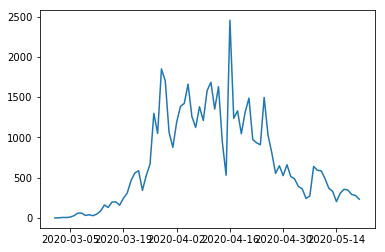

In [21]:
from pandas.plotting import register_matplotlib_converters

dataBelgium_pd = dataBelgium.toPandas()
plt.plot(dataBelgium_pd['dateRep'], dataBelgium_pd['cases'])

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
X = dataBelgium_pd.drop(['cases', 'dateRep'], axis = 1)
y = dataBelgium_pd['cases']


In [23]:
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

poly = PolynomialFeatures(degree=4)
X_transform = poly.fit_transform(X)
# X_test_transform = poly.fit_transform(X_test)

model = LinearRegression()
model.fit(X_transform,y)

#To retrieve the intercept:
print("Intercept")
print(model.intercept_)
print()
#For retrieving the coefficients:
print("Coefficients")
print(model.coef_)
print()


Intercept
204.1043769596214

Coefficients
[ 0.00000000e+00 -8.70691385e+01  7.99226762e+00 -1.67355553e-01
  1.01807265e-03]



In [24]:
# Calculate the result of the polynomial for a specific value of x
def p(x):
    result = model.intercept_
    for i in range(0, len(model.coef_)):
        result += model.coef_[i] * x**i 
    return result

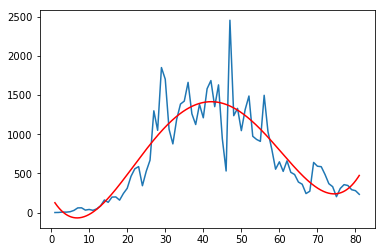

In [25]:
plt.plot(X, y)
# Plot the polynomial
t1 = np.arange(1, len(X), 0.01)
plt.plot(t1, p(t1), color='red')
plt.show()


# Euromillions

In [26]:
# Global results from Euromillions per draw

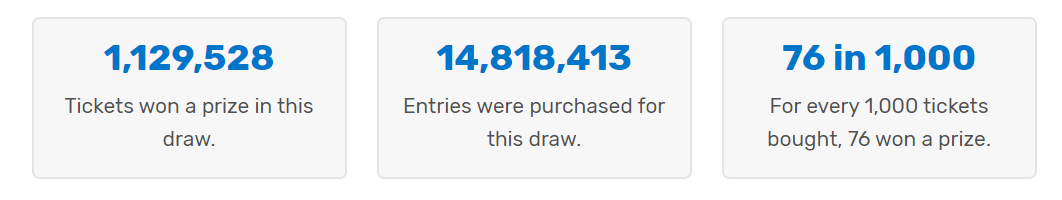

In [27]:
emglobal = sc.textFile("euromillionsGlobalResults.csv")
emglobal_df = emglobal.map(lambda line: line.split(";")).toDF(['dateDraw', 'numberOfEntriesPurchased', 'numberOfTicketsThatWonAPrice', 'numberOfTicketsPer1000ThatWonAPrice'])
emglobal_df.cache()
emglobal_df.show(n=5)

+----------+------------------------+----------------------------+-----------------------------------+
|  dateDraw|numberOfEntriesPurchased|numberOfTicketsThatWonAPrice|numberOfTicketsPer1000ThatWonAPrice|
+----------+------------------------+----------------------------+-----------------------------------+
|01-01-2019|              31,253,235|                   2,717,684|                        87 in 1,000|
|04-01-2019|              23,831,081|                   2,192,933|                        92 in 1,000|
|08-01-2019|              18,572,076|                   1,467,905|                        79 in 1,000|
|11-01-2019|              25,705,381|                   1,850,620|                        72 in 1,000|
|15-01-2019|              19,771,491|                   1,497,164|                        76 in 1,000|
+----------+------------------------+----------------------------+-----------------------------------+
only showing top 5 rows



In [28]:
# What are the datatypes?
emglobal_df.dtypes

[('dateDraw', 'string'),
 ('numberOfEntriesPurchased', 'string'),
 ('numberOfTicketsThatWonAPrice', 'string'),
 ('numberOfTicketsPer1000ThatWonAPrice', 'string')]

In [29]:
# change datatype from dateDraw to date
from pyspark.sql.functions import unix_timestamp, from_unixtime, to_date
emglobal_df = (emglobal_df.withColumn("dateDraw", to_date(unix_timestamp(emglobal_df["dateDraw"],"dd-MM-yyyy").cast("timestamp"))))
emglobal_df.show(n=15)   

+----------+------------------------+----------------------------+-----------------------------------+
|  dateDraw|numberOfEntriesPurchased|numberOfTicketsThatWonAPrice|numberOfTicketsPer1000ThatWonAPrice|
+----------+------------------------+----------------------------+-----------------------------------+
|2019-01-01|              31,253,235|                   2,717,684|                        87 in 1,000|
|2019-01-04|              23,831,081|                   2,192,933|                        92 in 1,000|
|2019-01-08|              18,572,076|                   1,467,905|                        79 in 1,000|
|2019-01-11|              25,705,381|                   1,850,620|                        72 in 1,000|
|2019-01-15|              19,771,491|                   1,497,164|                        76 in 1,000|
|2019-01-18|              26,996,152|                   2,047,422|                        76 in 1,000|
|2019-01-22|              21,026,625|                   1,585,425|       

In [30]:
from pyspark.sql.functions import udf
from pyspark.sql import functions as F
from pyspark.sql.types import IntegerType
from pyspark.sql.types import FloatType
from pyspark.sql.types import DecimalType
from pyspark.sql.types import StringType        

In [31]:
# Change the datatypes of numberOfEntriesPurchased, numberOfTicketsThatWonAPrice and numberOfTicketsPer1000ThatWonAPrice
def remove_comma_turn_into_integer(number_in_text):
    number_in_text = number_in_text.replace(',','')
    return int(number_in_text)

udf_turn_into_integer = udf(lambda x: remove_comma_turn_into_integer(x), returnType = IntegerType())

def clean_percentage(number_in_text):
    number_in_text = number_in_text.replace(' in 1,000','')
    return int(number_in_text)

udf_clean_percentage = udf(lambda x: clean_percentage(x), returnType = IntegerType())

In [32]:
emglobal_df = (emglobal_df.withColumn("numberOfTicketsThatWonAPrice", udf_turn_into_integer("numberOfTicketsThatWonAPrice"))
              .withColumn("numberOfEntriesPurchased", udf_turn_into_integer("numberOfEntriesPurchased"))
              .withColumn("numberOfTicketsPer1000ThatWonAPrice", udf_clean_percentage("numberOfTicketsPer1000ThatWonAPrice")))

emglobal_df.show(n=15)   

+----------+------------------------+----------------------------+-----------------------------------+
|  dateDraw|numberOfEntriesPurchased|numberOfTicketsThatWonAPrice|numberOfTicketsPer1000ThatWonAPrice|
+----------+------------------------+----------------------------+-----------------------------------+
|2019-01-01|                31253235|                     2717684|                                 87|
|2019-01-04|                23831081|                     2192933|                                 92|
|2019-01-08|                18572076|                     1467905|                                 79|
|2019-01-11|                25705381|                     1850620|                                 72|
|2019-01-15|                19771491|                     1497164|                                 76|
|2019-01-18|                26996152|                     2047422|                                 76|
|2019-01-22|                21026625|                     1585425|       

In [33]:
# What is the top 10 of numberOfEntriesPurchased between 01/01/2019 and 15/05/2020
emglobal_top10 = (emglobal_df.sort(['numberOfEntriesPurchased'], ascending=False)).limit(10)
emglobal_top10.show(n=10)

+----------+------------------------+----------------------------+-----------------------------------+
|  dateDraw|numberOfEntriesPurchased|numberOfTicketsThatWonAPrice|numberOfTicketsPer1000ThatWonAPrice|
+----------+------------------------+----------------------------+-----------------------------------+
|2019-10-08|                61419076|                     4808839|                                 78|
|2019-10-04|                59239592|                     4350671|                                 73|
|2019-09-27|                55199552|                     3747371|                                 68|
|2019-09-20|                48687898|                     3776914|                                 78|
|2019-09-13|                47804645|                     3684076|                                 77|
|2019-10-01|                47035044|                     3422052|                                 73|
|2019-02-01|                46781482|                     3346689|       

In [34]:
# Specific results from Euromillions per draw per country (Belgium, UK, Ireland, France, Spain, Portugal, Switzerland, Austria and Luxembourg)
# Switzerland and Luxembourg are taken together in Euromillions

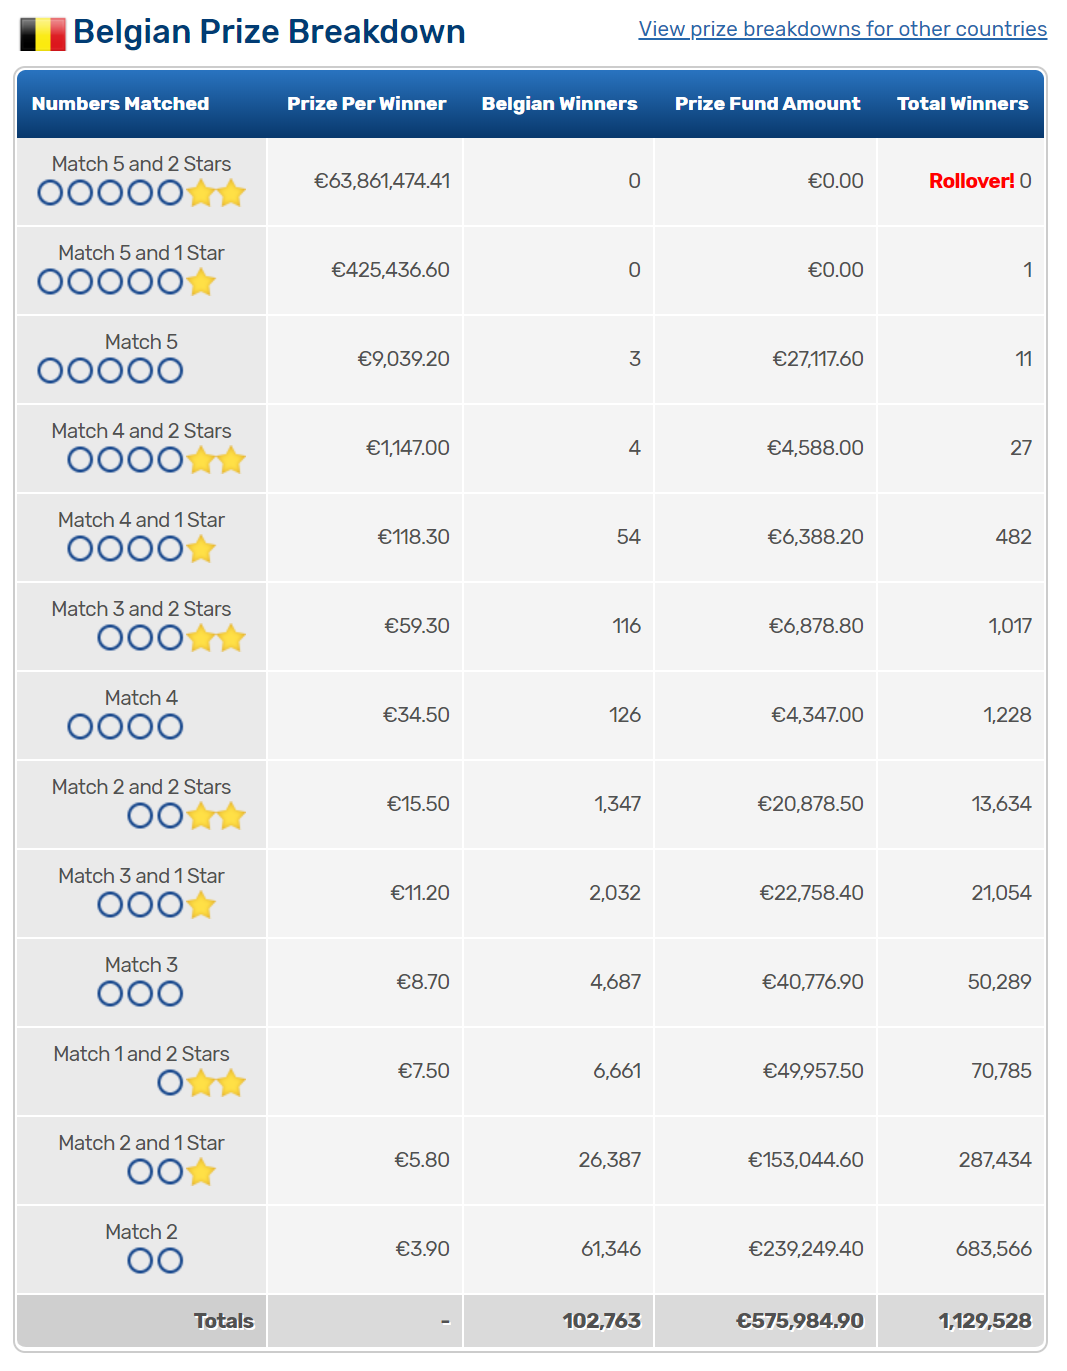

In [35]:
emspecific = sc.textFile("euromillionsSpecificResults.csv")
emspecific_df = emspecific.map(lambda line: line.split(";")).toDF(['dateDraw', 'country','numbersMatched', 'prizePerWinner', 'winners','prizeFundAmount', 'prizeTotalWinners'])
emspecific_df.show(n=15)

+----------+-------+-------------------+--------------+-------+---------------+-----------------+
|  dateDraw|country|     numbersMatched|prizePerWinner|winners|prizeFundAmount|prizeTotalWinners|
+----------+-------+-------------------+--------------+-------+---------------+-----------------+
|01-01-2019|     BE|Match 5 and 2 Stars|129,645,665.00|      0|           0.00|                1|
|01-01-2019|     BE| Match 5 and 1 Star|    123,450.20|      1|     123,450.20|               11|
|01-01-2019|     BE|            Match 5|     26,356.80|      2|      52,713.60|               12|
|01-01-2019|     BE|Match 4 and 2 Stars|      1,798.80|      9|      16,189.20|               86|
|01-01-2019|     BE| Match 4 and 1 Star|        118.50|    104|      12,324.00|            1,392|
|01-01-2019|     BE|Match 3 and 2 Stars|         73.60|    220|      16,192.00|            3,126|
|01-01-2019|     BE|            Match 4|         38.70|    230|       8,901.00|            3,368|
|01-01-2019|     BE|

In [36]:
# What are the datatypes?
emspecific_df.dtypes

[('dateDraw', 'string'),
 ('country', 'string'),
 ('numbersMatched', 'string'),
 ('prizePerWinner', 'string'),
 ('winners', 'string'),
 ('prizeFundAmount', 'string'),
 ('prizeTotalWinners', 'string')]

In [37]:
# What are the datatypes?
from pyspark.sql.functions import unix_timestamp, from_unixtime, to_date
emspecific_df = (emspecific_df.withColumn("dateDraw", to_date(unix_timestamp(emspecific_df["dateDraw"],"dd-MM-yyyy").cast("timestamp"))))
emspecific_df.show(n=15)   

+----------+-------+-------------------+--------------+-------+---------------+-----------------+
|  dateDraw|country|     numbersMatched|prizePerWinner|winners|prizeFundAmount|prizeTotalWinners|
+----------+-------+-------------------+--------------+-------+---------------+-----------------+
|2019-01-01|     BE|Match 5 and 2 Stars|129,645,665.00|      0|           0.00|                1|
|2019-01-01|     BE| Match 5 and 1 Star|    123,450.20|      1|     123,450.20|               11|
|2019-01-01|     BE|            Match 5|     26,356.80|      2|      52,713.60|               12|
|2019-01-01|     BE|Match 4 and 2 Stars|      1,798.80|      9|      16,189.20|               86|
|2019-01-01|     BE| Match 4 and 1 Star|        118.50|    104|      12,324.00|            1,392|
|2019-01-01|     BE|Match 3 and 2 Stars|         73.60|    220|      16,192.00|            3,126|
|2019-01-01|     BE|            Match 4|         38.70|    230|       8,901.00|            3,368|
|2019-01-01|     BE|

In [38]:
# Removing rows from LU because these are contained in Switzerland
emspecific_df = emspecific_df.where(emspecific_df['country'] != 'LU')
emspecific_df.show(n=15) 

+----------+-------+-------------------+--------------+-------+---------------+-----------------+
|  dateDraw|country|     numbersMatched|prizePerWinner|winners|prizeFundAmount|prizeTotalWinners|
+----------+-------+-------------------+--------------+-------+---------------+-----------------+
|2019-01-01|     BE|Match 5 and 2 Stars|129,645,665.00|      0|           0.00|                1|
|2019-01-01|     BE| Match 5 and 1 Star|    123,450.20|      1|     123,450.20|               11|
|2019-01-01|     BE|            Match 5|     26,356.80|      2|      52,713.60|               12|
|2019-01-01|     BE|Match 4 and 2 Stars|      1,798.80|      9|      16,189.20|               86|
|2019-01-01|     BE| Match 4 and 1 Star|        118.50|    104|      12,324.00|            1,392|
|2019-01-01|     BE|Match 3 and 2 Stars|         73.60|    220|      16,192.00|            3,126|
|2019-01-01|     BE|            Match 4|         38.70|    230|       8,901.00|            3,368|
|2019-01-01|     BE|

In [39]:
# Changing the datatypes
def clean_and_turn_into_float(number_in_text):
    number_in_text = number_in_text.replace('HF','').replace(',','').strip()
    # print(number_in_text)
    if number_in_text == "":
        return 0.0
    return float(number_in_text)

udf_clean_and_turn_into_float = udf(lambda x:clean_and_turn_into_float(x), returnType = FloatType())


def remove_comma_and_rollover_turn_into_integer(number_in_text):
    number_in_text = number_in_text.replace('Rollover!','').replace(',','')
    return int(number_in_text)

udf_remove_comma_and_rollover_turn_into_integer = udf(lambda x: remove_comma_and_rollover_turn_into_integer(x), returnType = IntegerType())

In [40]:
emspecific_df = (emspecific_df
                 .withColumn("prizePerWinner", udf_clean_and_turn_into_float("prizePerWinner"))
                  .withColumn("winners", udf_turn_into_integer("winners"))
              .withColumn("prizeFundAmount", udf_clean_and_turn_into_float("prizeFundAmount"))
              .withColumn("prizeTotalWinners", udf_remove_comma_and_rollover_turn_into_integer("prizeTotalWinners")))

emspecific_df.show(n=15)   

+----------+-------+-------------------+--------------+-------+---------------+-----------------+
|  dateDraw|country|     numbersMatched|prizePerWinner|winners|prizeFundAmount|prizeTotalWinners|
+----------+-------+-------------------+--------------+-------+---------------+-----------------+
|2019-01-01|     BE|Match 5 and 2 Stars|  1.29645664E8|      0|            0.0|                1|
|2019-01-01|     BE| Match 5 and 1 Star|      123450.2|      1|       123450.2|               11|
|2019-01-01|     BE|            Match 5|       26356.8|      2|        52713.6|               12|
|2019-01-01|     BE|Match 4 and 2 Stars|        1798.8|      9|        16189.2|               86|
|2019-01-01|     BE| Match 4 and 1 Star|         118.5|    104|        12324.0|             1392|
|2019-01-01|     BE|Match 3 and 2 Stars|          73.6|    220|        16192.0|             3126|
|2019-01-01|     BE|            Match 4|          38.7|    230|         8901.0|             3368|
|2019-01-01|     BE|

In [41]:
# Removing the columns prizePerWinner, prizeFundAmount
# There are for now of no importance to us

emspecific_df = emspecific_df.drop('prizePerWinner','prizeFundAmount')
emspecific_df.show(n=15)

+----------+-------+-------------------+-------+-----------------+
|  dateDraw|country|     numbersMatched|winners|prizeTotalWinners|
+----------+-------+-------------------+-------+-----------------+
|2019-01-01|     BE|Match 5 and 2 Stars|      0|                1|
|2019-01-01|     BE| Match 5 and 1 Star|      1|               11|
|2019-01-01|     BE|            Match 5|      2|               12|
|2019-01-01|     BE|Match 4 and 2 Stars|      9|               86|
|2019-01-01|     BE| Match 4 and 1 Star|    104|             1392|
|2019-01-01|     BE|Match 3 and 2 Stars|    220|             3126|
|2019-01-01|     BE|            Match 4|    230|             3368|
|2019-01-01|     BE|Match 2 and 2 Stars|   3016|            39603|
|2019-01-01|     BE| Match 3 and 1 Star|   4243|            54281|
|2019-01-01|     BE|            Match 3|   9531|           125298|
|2019-01-01|     BE|Match 1 and 2 Stars|  14759|           191321|
|2019-01-01|     BE| Match 2 and 1 Star|  55322|           708

In [42]:
# The Euromillions draw is in France a little bit different from the
# rest of Europe. They have Euromillions (with Etoile+ option)

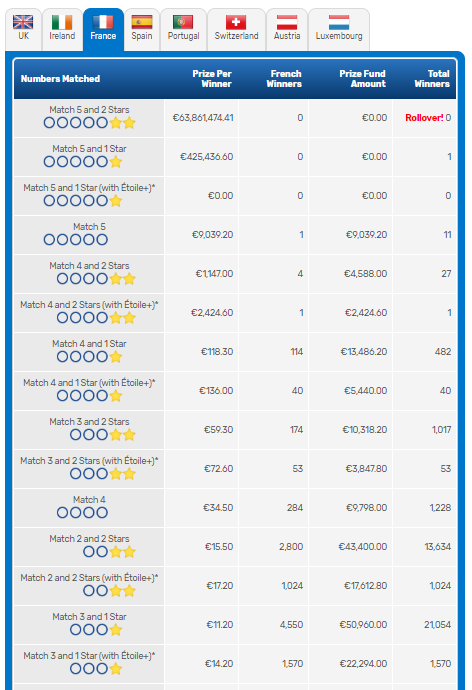

In [43]:
totals = emspecific_df.where((emspecific_df['country'] != 'FR') & (emspecific_df['numbersMatched'] == 'Totals'))
totals.show(n=15)

+----------+-------+--------------+-------+-----------------+
|  dateDraw|country|numbersMatched|winners|prizeTotalWinners|
+----------+-------+--------------+-------+-----------------+
|2019-01-01|     BE|        Totals| 209055|          2717684|
|2019-01-01|     UK|        Totals| 916064|          2717684|
|2019-01-01|     IE|        Totals|  63368|          2717684|
|2019-01-01|     ES|        Totals| 339874|          2717684|
|2019-01-01|     PT|        Totals| 276760|          2717684|
|2019-01-01|     CH|        Totals| 185086|          2717684|
|2019-01-01|     AT|        Totals| 144974|          2717684|
|2019-01-04|     BE|        Totals| 188445|          2192933|
|2019-01-04|     UK|        Totals| 488162|          2192933|
|2019-01-04|     IE|        Totals|  50690|          2192933|
|2019-01-04|     ES|        Totals| 429527|          2192933|
|2019-01-04|     PT|        Totals| 291816|          2192933|
|2019-01-04|     CH|        Totals| 152155|          2192933|
|2019-01

In [44]:
totals = totals.drop('numbersMatched')
totals.show(n=15)

+----------+-------+-------+-----------------+
|  dateDraw|country|winners|prizeTotalWinners|
+----------+-------+-------+-----------------+
|2019-01-01|     BE| 209055|          2717684|
|2019-01-01|     UK| 916064|          2717684|
|2019-01-01|     IE|  63368|          2717684|
|2019-01-01|     ES| 339874|          2717684|
|2019-01-01|     PT| 276760|          2717684|
|2019-01-01|     CH| 185086|          2717684|
|2019-01-01|     AT| 144974|          2717684|
|2019-01-04|     BE| 188445|          2192933|
|2019-01-04|     UK| 488162|          2192933|
|2019-01-04|     IE|  50690|          2192933|
|2019-01-04|     ES| 429527|          2192933|
|2019-01-04|     PT| 291816|          2192933|
|2019-01-04|     CH| 152155|          2192933|
|2019-01-04|     AT|  96282|          2192933|
|2019-01-08|     BE| 106165|          1467905|
+----------+-------+-------+-----------------+
only showing top 15 rows



In [45]:
# Because in France there is an Étoile+ option, the totals should be calculated seperately
totalsFR = emspecific_df.where((emspecific_df['country'] == 'FR') & (emspecific_df['numbersMatched'] != 'Totals'))
totalsFR.show(n=15)


+----------+-------+--------------------+-------+-----------------+
|  dateDraw|country|      numbersMatched|winners|prizeTotalWinners|
+----------+-------+--------------------+-------+-----------------+
|2019-01-01|     FR| Match 5 and 2 Stars|      0|                1|
|2019-01-01|     FR|  Match 5 and 1 Star|      2|               11|
|2019-01-01|     FR|Match 5 and 1 Sta...|      0|                0|
|2019-01-01|     FR|             Match 5|      3|               12|
|2019-01-01|     FR| Match 4 and 2 Stars|     23|               86|
|2019-01-01|     FR|Match 4 and 2 Sta...|      2|                2|
|2019-01-01|     FR|  Match 4 and 1 Star|    363|             1392|
|2019-01-01|     FR|Match 4 and 1 Sta...|     72|               72|
|2019-01-01|     FR| Match 3 and 2 Stars|    840|             3126|
|2019-01-01|     FR|Match 3 and 2 Sta...|    189|              189|
|2019-01-01|     FR|             Match 4|    841|             3368|
|2019-01-01|     FR| Match 2 and 2 Stars|   9602

In [46]:
# *Étoile+ prize amounts are only applicable to French tickets that played the Étoile+ option.
# So we don't need a seperate category for that
# Renaming numbersMatched
def rename_numbers_matched(text):
    if "toile" in text:
        return "ETOILE"
    elif text.startswith("Match 5 and 2 Stars"):
        return "5N2S"
    elif text.startswith("Match 5 and 1 Star"): 
        return "5N1S"
    elif text.startswith("Match 5"): 
        return "5N0S"
    elif text.startswith("Match 4 and 2 Stars"): 
        return "4N2S"
    elif text.startswith("Match 4 and 1 Star"): 
        return "4N1S"
    elif text.startswith("Match 4"): 
        return "4N0S"
    elif text.startswith("Match 3 and 2 Stars"): 
        return "3N2S"
    elif text.startswith("Match 3 and 1 Star"): 
        return "3N1S"
    elif text.startswith("Match 3"): 
        return "3N0S"
    elif text.startswith("Match 2 and 2 Stars"): 
        return "2N2S"
    elif text.startswith("Match 2 and 1 Star"): 
        return "2N1S"
    elif text.startswith("Match 2"): 
        return "2N0S"
    elif text.startswith("Match 1 and 2 Stars"): 
        return "1N2S"
    elif text.startswith("Match 1 and 1 Star"): 
        return "1N1S"
    elif text.startswith("Match 1"): 
        return "1N0S"
    elif text.startswith("Match 0 and 1 Star"): 
        return "0N1S"    

udf_rename_numbers_matched = udf(lambda x: rename_numbers_matched(x), returnType = StringType())

In [47]:
totalsFR = (totalsFR.withColumn("numbersMatched", udf_rename_numbers_matched("numbersMatched")))
totalsFR.show(n=15)

+----------+-------+--------------+-------+-----------------+
|  dateDraw|country|numbersMatched|winners|prizeTotalWinners|
+----------+-------+--------------+-------+-----------------+
|2019-01-01|     FR|          5N2S|      0|                1|
|2019-01-01|     FR|          5N1S|      2|               11|
|2019-01-01|     FR|        ETOILE|      0|                0|
|2019-01-01|     FR|          5N0S|      3|               12|
|2019-01-01|     FR|          4N2S|     23|               86|
|2019-01-01|     FR|        ETOILE|      2|                2|
|2019-01-01|     FR|          4N1S|    363|             1392|
|2019-01-01|     FR|        ETOILE|     72|               72|
|2019-01-01|     FR|          3N2S|    840|             3126|
|2019-01-01|     FR|        ETOILE|    189|              189|
|2019-01-01|     FR|          4N0S|    841|             3368|
|2019-01-01|     FR|          2N2S|   9602|            39603|
|2019-01-01|     FR|        ETOILE|   2171|             2171|
|2019-01

In [48]:
# Removing the lines with 0N1S because they are only for France for the etoile option
totalsFR = totalsFR.where(totalsFR['numbersMatched'] != 'ETOILE')
totalsFR.show(n=15)

+----------+-------+--------------+-------+-----------------+
|  dateDraw|country|numbersMatched|winners|prizeTotalWinners|
+----------+-------+--------------+-------+-----------------+
|2019-01-01|     FR|          5N2S|      0|                1|
|2019-01-01|     FR|          5N1S|      2|               11|
|2019-01-01|     FR|          5N0S|      3|               12|
|2019-01-01|     FR|          4N2S|     23|               86|
|2019-01-01|     FR|          4N1S|    363|             1392|
|2019-01-01|     FR|          3N2S|    840|             3126|
|2019-01-01|     FR|          4N0S|    841|             3368|
|2019-01-01|     FR|          2N2S|   9602|            39603|
|2019-01-01|     FR|          3N1S|  12507|            54281|
|2019-01-01|     FR|          3N0S|  28797|           125298|
|2019-01-01|     FR|          1N2S|  43241|           191321|
|2019-01-01|     FR|          2N1S| 149674|           708609|
|2019-01-01|     FR|          2N0S| 336610|          1590576|
|2019-01

In [49]:
totalsFR = totalsFR.drop('numbersMatched')
totalsFR.show(n=15)

+----------+-------+-------+-----------------+
|  dateDraw|country|winners|prizeTotalWinners|
+----------+-------+-------+-----------------+
|2019-01-01|     FR|      0|                1|
|2019-01-01|     FR|      2|               11|
|2019-01-01|     FR|      3|               12|
|2019-01-01|     FR|     23|               86|
|2019-01-01|     FR|    363|             1392|
|2019-01-01|     FR|    840|             3126|
|2019-01-01|     FR|    841|             3368|
|2019-01-01|     FR|   9602|            39603|
|2019-01-01|     FR|  12507|            54281|
|2019-01-01|     FR|  28797|           125298|
|2019-01-01|     FR|  43241|           191321|
|2019-01-01|     FR| 149674|           708609|
|2019-01-01|     FR| 336610|          1590576|
|2019-01-04|     FR|      0|                0|
|2019-01-04|     FR|      4|                7|
+----------+-------+-------+-----------------+
only showing top 15 rows



In [50]:
# totalsFR the totals for France

from pyspark.sql import Row
from pyspark.sql.functions import sum

totalsFR = (totalsFR.groupBy(['dateDraw','country'])
              .agg(sum("winners").alias("winners"), sum("prizeTotalWinners").alias("prizeTotalWinners"))
           .sort(['dateDraw','country'], ascending=True))
totalsFR.show(n=15) 

+----------+-------+-------+-----------------+
|  dateDraw|country|winners|prizeTotalWinners|
+----------+-------+-------+-----------------+
|2019-01-01|     FR| 582503|          2717684|
|2019-01-04|     FR| 495856|          2192933|
|2019-01-08|     FR| 298786|          1467905|
|2019-01-11|     FR| 378306|          1850620|
|2019-01-15|     FR| 293100|          1497164|
|2019-01-18|     FR| 424864|          2047422|
|2019-01-22|     FR| 312797|          1585425|
|2019-01-25|     FR| 518781|          2422860|
|2019-01-29|     FR| 329201|          1774795|
|2019-02-01|     FR| 736361|          3346689|
|2019-02-05|     FR| 429727|          2228563|
|2019-02-08|     FR| 680724|          3172680|
|2019-02-12|     FR| 402757|          2225992|
|2019-02-15|     FR| 608925|          3199745|
|2019-02-19|     FR| 612469|          3024006|
+----------+-------+-------+-----------------+
only showing top 15 rows



In [51]:
# Combining the other results with the results from France
totals = totals.union(totalsFR)

In [52]:
totals = totals.sort(['dateDraw','country'], ascending=True)
totals.show(n=25)

+----------+-------+-------+-----------------+
|  dateDraw|country|winners|prizeTotalWinners|
+----------+-------+-------+-----------------+
|2019-01-01|     AT| 144974|          2717684|
|2019-01-01|     BE| 209055|          2717684|
|2019-01-01|     CH| 185086|          2717684|
|2019-01-01|     ES| 339874|          2717684|
|2019-01-01|     FR| 582503|          2717684|
|2019-01-01|     IE|  63368|          2717684|
|2019-01-01|     PT| 276760|          2717684|
|2019-01-01|     UK| 916064|          2717684|
|2019-01-04|     AT|  96282|          2192933|
|2019-01-04|     BE| 188445|          2192933|
|2019-01-04|     CH| 152155|          2192933|
|2019-01-04|     ES| 429527|          2192933|
|2019-01-04|     FR| 495856|          2192933|
|2019-01-04|     IE|  50690|          2192933|
|2019-01-04|     PT| 291816|          2192933|
|2019-01-04|     UK| 488162|          2192933|
|2019-01-08|     AT|  78966|          1467905|
|2019-01-08|     BE| 106165|          1467905|
|2019-01-08| 

In [53]:
# Joining the global results with the totals
totals = totals.join(emglobal_df, totals.dateDraw == emglobal_df.dateDraw).drop(emglobal_df.dateDraw)
totals.show(n=10)

+----------+-------+-------+-----------------+------------------------+----------------------------+-----------------------------------+
|  dateDraw|country|winners|prizeTotalWinners|numberOfEntriesPurchased|numberOfTicketsThatWonAPrice|numberOfTicketsPer1000ThatWonAPrice|
+----------+-------+-------+-----------------+------------------------+----------------------------+-----------------------------------+
|2019-01-01|     BE| 209055|          2717684|                31253235|                     2717684|                                 87|
|2019-01-01|     UK| 916064|          2717684|                31253235|                     2717684|                                 87|
|2019-01-01|     IE|  63368|          2717684|                31253235|                     2717684|                                 87|
|2019-01-01|     ES| 339874|          2717684|                31253235|                     2717684|                                 87|
|2019-01-01|     PT| 276760|          271

In [54]:
totals = totals.drop('prizeTotalWinners','numberOfTicketsPer1000ThatWonAPrice')
totals.show(n=10)

+----------+-------+-------+------------------------+----------------------------+
|  dateDraw|country|winners|numberOfEntriesPurchased|numberOfTicketsThatWonAPrice|
+----------+-------+-------+------------------------+----------------------------+
|2019-01-01|     BE| 209055|                31253235|                     2717684|
|2019-01-01|     UK| 916064|                31253235|                     2717684|
|2019-01-01|     IE|  63368|                31253235|                     2717684|
|2019-01-01|     ES| 339874|                31253235|                     2717684|
|2019-01-01|     PT| 276760|                31253235|                     2717684|
|2019-01-01|     CH| 185086|                31253235|                     2717684|
|2019-01-01|     AT| 144974|                31253235|                     2717684|
|2019-01-04|     BE| 188445|                23831081|                     2192933|
|2019-01-04|     UK| 488162|                23831081|                     2192933|
|201

In [55]:
totals = totals.sort(['dateDraw','country'], ascending=True)
totals.show(n=50)

+----------+-------+-------+------------------------+----------------------------+
|  dateDraw|country|winners|numberOfEntriesPurchased|numberOfTicketsThatWonAPrice|
+----------+-------+-------+------------------------+----------------------------+
|2019-01-01|     AT| 144974|                31253235|                     2717684|
|2019-01-01|     BE| 209055|                31253235|                     2717684|
|2019-01-01|     CH| 185086|                31253235|                     2717684|
|2019-01-01|     ES| 339874|                31253235|                     2717684|
|2019-01-01|     FR| 582503|                31253235|                     2717684|
|2019-01-01|     IE|  63368|                31253235|                     2717684|
|2019-01-01|     PT| 276760|                31253235|                     2717684|
|2019-01-01|     UK| 916064|                31253235|                     2717684|
|2019-01-04|     AT|  96282|                23831081|                     2192933|
|201

In [56]:
# Try to find out in which countries people play more or less on euromillions
# We have to take into account that in Spain there was no Euromillions draw any more since 20/03/2020 otherwise the calculations won't be correct
# So we are using the data up to 20/03/2020
# How are we going to calculate this?
# We are going to get the relative amount of numberOfTicketsThatWonAPrice per country 
# and the relative amount of the population of a country for alle Euromillions countries
# To get the population we can use the file COVID19

totalsUpTo20March2020 =  totals.where((totals['dateDraw'] <= '2020-03-20')).sort(['dateDraw'], ascending=False)
totalsUpTo20March2020.show(n=20)

+----------+-------+-------+------------------------+----------------------------+
|  dateDraw|country|winners|numberOfEntriesPurchased|numberOfTicketsThatWonAPrice|
+----------+-------+-------+------------------------+----------------------------+
|2020-03-20|     PT| 148503|                14310644|                     1095514|
|2020-03-20|     UK| 388858|                14310644|                     1095514|
|2020-03-20|     FR| 235287|                14310644|                     1095514|
|2020-03-20|     CH|  90251|                14310644|                     1095514|
|2020-03-20|     ES|  16603|                14310644|                     1095514|
|2020-03-20|     AT|  59224|                14310644|                     1095514|
|2020-03-20|     IE|  43456|                14310644|                     1095514|
|2020-03-20|     BE| 113332|                14310644|                     1095514|
|2020-03-17|     FR| 311376|                14090279|                     1271942|
|202

In [57]:
# How many winners were there between 01/01/2019 and 20/03/2020 for each country
# How many tickets won a price over all countries
# If we do winners_per_country / total_number_of_winners we know the relative amount of players for each country

totalsUpTo20March2020PerCountry = totalsUpTo20March2020.groupBy('country').agg(sum("winners").alias("winners"), 
                                                 sum("numberOfTicketsThatWonAPrice").alias("numberOfTicketsThatWonAPrice"))
totalsUpTo20March2020PerCountry.show(n=10)

+-------+--------+----------------------------+
|country| winners|numberOfTicketsThatWonAPrice|
+-------+--------+----------------------------+
|     AT|13860052|                   260171779|
|     PT|30135387|                   260171779|
|     ES|50482260|                   260171779|
|     FR|52125830|                   260171779|
|     CH|17676110|                   260171779|
|     UK|68189888|                   260171779|
|     IE| 7212800|                   260171779|
|     BE|20489452|                   260171779|
+-------+--------+----------------------------+



In [58]:
# Join beteen the previous dataframe and popCountries so we know the population per country
totalsUpTo20March2020PerCountry = totalsUpTo20March2020PerCountry.join(popCountries, totalsUpTo20March2020PerCountry.country == popCountries.geoId).drop('geoId')
totalsUpTo20March2020PerCountry.show(n=10)

+-------+--------+----------------------------+-----------+
|country| winners|numberOfTicketsThatWonAPrice|popData2018|
+-------+--------+----------------------------+-----------+
|     AT|13860052|                   260171779|    8847037|
|     PT|30135387|                   260171779|   10281762|
|     ES|50482260|                   260171779|   46723749|
|     FR|52125830|                   260171779|   66987244|
|     CH|17676110|                   260171779|    8516543|
|     UK|68189888|                   260171779|   66488991|
|     IE| 7212800|                   260171779|    4853506|
|     BE|20489452|                   260171779|   11422068|
+-------+--------+----------------------------+-----------+



In [59]:
# Calculate the total population in 2018 for all Euromillions countries

from pyspark.sql.functions import *
from pyspark.sql.window import Window
from pyspark.sql.functions import col, when, lit

totalsUpTo20March2020PerCountry = totalsUpTo20March2020PerCountry.withColumn("totalPop2018", sum("popData2018").over(Window.orderBy(asc("country")).rowsBetween(Window.unboundedPreceding,Window.unboundedFollowing)))
totalsUpTo20March2020PerCountry.show(n=10)

+-------+--------+----------------------------+-----------+------------+
|country| winners|numberOfTicketsThatWonAPrice|popData2018|totalPop2018|
+-------+--------+----------------------------+-----------+------------+
|     AT|13860052|                   260171779|    8847037|   224120900|
|     BE|20489452|                   260171779|   11422068|   224120900|
|     CH|17676110|                   260171779|    8516543|   224120900|
|     ES|50482260|                   260171779|   46723749|   224120900|
|     FR|52125830|                   260171779|   66987244|   224120900|
|     IE| 7212800|                   260171779|    4853506|   224120900|
|     PT|30135387|                   260171779|   10281762|   224120900|
|     UK|68189888|                   260171779|   66488991|   224120900|
+-------+--------+----------------------------+-----------+------------+



In [60]:
# Calculate the relative shares in number of winners and population data
import pyspark.sql.functions as func

totalsPerCountryPercentage = (totalsUpTo20March2020PerCountry.withColumn("percentagePlayers", func.round(100.0 * totalsUpTo20March2020PerCountry['winners'] / totalsUpTo20March2020PerCountry['numberOfTicketsThatWonAPrice']))
         .withColumn("percentagePopulation", func.round(100.0 * totalsUpTo20March2020PerCountry['popData2018'] / totalsUpTo20March2020PerCountry['totalPop2018'])))
totalsPerCountryPercentage.show(n=10)


+-------+--------+----------------------------+-----------+------------+-----------------+--------------------+
|country| winners|numberOfTicketsThatWonAPrice|popData2018|totalPop2018|percentagePlayers|percentagePopulation|
+-------+--------+----------------------------+-----------+------------+-----------------+--------------------+
|     AT|13860052|                   260171779|    8847037|   224120900|              5.0|                 4.0|
|     BE|20489452|                   260171779|   11422068|   224120900|              8.0|                 5.0|
|     CH|17676110|                   260171779|    8516543|   224120900|              7.0|                 4.0|
|     ES|50482260|                   260171779|   46723749|   224120900|             19.0|                21.0|
|     FR|52125830|                   260171779|   66987244|   224120900|             20.0|                30.0|
|     IE| 7212800|                   260171779|    4853506|   224120900|              3.0|              

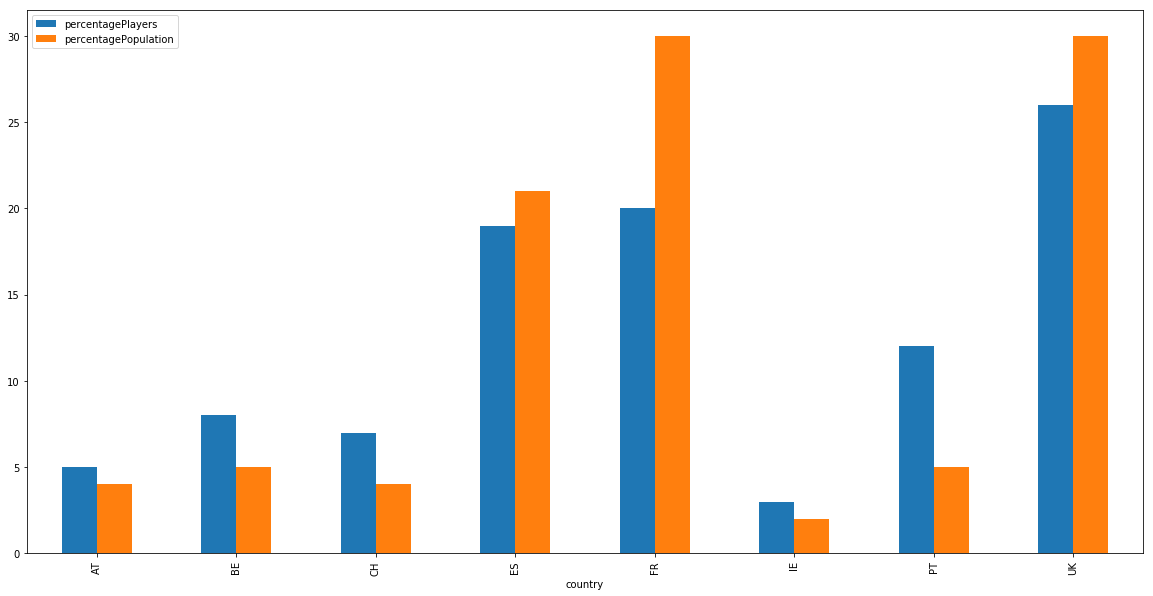

In [61]:
# We can see that relatively more people play on Euromillions in for example Belgium and in Portugal
totalsPerCountryPercentage_pd = totalsPerCountryPercentage.toPandas()
totalsPerCountryPercentage_pd.plot(kind='bar', x="country", y=["percentagePlayers", "percentagePopulation"], figsize=(20,10))

In [62]:
# Back to our problem: how does the corona lockdown influences people playing on Euromillions
# We cannot compare the data of Spain because there are no draw's any more since 20/03/2020
# So we remove those results
totalsWithoutSpain = totals.where(totals['country'] != 'ES')
totalsWithoutSpain.show(n=25)

+----------+-------+-------+------------------------+----------------------------+
|  dateDraw|country|winners|numberOfEntriesPurchased|numberOfTicketsThatWonAPrice|
+----------+-------+-------+------------------------+----------------------------+
|2019-01-01|     AT| 144974|                31253235|                     2717684|
|2019-01-01|     BE| 209055|                31253235|                     2717684|
|2019-01-01|     CH| 185086|                31253235|                     2717684|
|2019-01-01|     FR| 582503|                31253235|                     2717684|
|2019-01-01|     IE|  63368|                31253235|                     2717684|
|2019-01-01|     PT| 276760|                31253235|                     2717684|
|2019-01-01|     UK| 916064|                31253235|                     2717684|
|2019-01-04|     AT|  96282|                23831081|                     2192933|
|2019-01-04|     BE| 188445|                23831081|                     2192933|
|201

In [63]:
# Calculate the number of entries purchased by country for each draw
# How is this done?
# We know the number of winners per country for each draw
# We know the number of total winners for each draw
# We know the total number of entries for each draw
# =>
# number_of_entries_per_draw_per_country = number_of_winners_per_country * total_number_of_entries / total_number_of_winners
# Of course this is an approximate value
# Because the numbers are quite large, we divide them by 10000 
import pyspark.sql.functions as func

totalsWithoutSpain = (totalsWithoutSpain.withColumn("numberOfEntriesPurchasedPerCountry", func.round(1.0 * totalsWithoutSpain['numberOfEntriesPurchased'] * totalsWithoutSpain['winners'] / totalsWithoutSpain['numberOfTicketsThatWonAPrice']))
         .withColumn("numberOfEntriesPurchasedPerCountryBy10000", func.round(1.0 / 10000.0 * totalsWithoutSpain['numberOfEntriesPurchased'] * totalsWithoutSpain['winners'] / totalsWithoutSpain['numberOfTicketsThatWonAPrice'])))

totalsWithoutSpain.show(n=15)

+----------+-------+-------+------------------------+----------------------------+----------------------------------+-----------------------------------------+
|  dateDraw|country|winners|numberOfEntriesPurchased|numberOfTicketsThatWonAPrice|numberOfEntriesPurchasedPerCountry|numberOfEntriesPurchasedPerCountryBy10000|
+----------+-------+-------+------------------------+----------------------------+----------------------------------+-----------------------------------------+
|2019-01-01|     AT| 144974|                31253235|                     2717684|                         1667194.0|                                    167.0|
|2019-01-01|     BE| 209055|                31253235|                     2717684|                         2404122.0|                                    240.0|
|2019-01-01|     CH| 185086|                31253235|                     2717684|                         2128480.0|                                    213.0|
|2019-01-01|     FR| 582503|            

In [64]:
# There is a big difference between the number of players on tuesday and on friday
# we make 2 seperate datasets: one for tuesday and one for friday

from datetime import datetime

totalsWithoutSpainTU = totalsWithoutSpain.where(dayofweek(totalsWithoutSpain['dateDraw']) == 3) 
totalsWithoutSpainTU.show(n=15)

+----------+-------+-------+------------------------+----------------------------+----------------------------------+-----------------------------------------+
|  dateDraw|country|winners|numberOfEntriesPurchased|numberOfTicketsThatWonAPrice|numberOfEntriesPurchasedPerCountry|numberOfEntriesPurchasedPerCountryBy10000|
+----------+-------+-------+------------------------+----------------------------+----------------------------------+-----------------------------------------+
|2019-01-01|     AT| 144974|                31253235|                     2717684|                         1667194.0|                                    167.0|
|2019-01-01|     BE| 209055|                31253235|                     2717684|                         2404122.0|                                    240.0|
|2019-01-01|     CH| 185086|                31253235|                     2717684|                         2128480.0|                                    213.0|
|2019-01-01|     FR| 582503|            

In [65]:
from datetime import datetime

totalsWithoutSpainFR = totalsWithoutSpain.where(dayofweek(totalsWithoutSpain['dateDraw']) == 6) 
totalsWithoutSpainFR.show(n=15)

+----------+-------+-------+------------------------+----------------------------+----------------------------------+-----------------------------------------+
|  dateDraw|country|winners|numberOfEntriesPurchased|numberOfTicketsThatWonAPrice|numberOfEntriesPurchasedPerCountry|numberOfEntriesPurchasedPerCountryBy10000|
+----------+-------+-------+------------------------+----------------------------+----------------------------------+-----------------------------------------+
|2019-01-04|     AT|  96282|                23831081|                     2192933|                         1046317.0|                                    105.0|
|2019-01-04|     BE| 188445|                23831081|                     2192933|                         2047873.0|                                    205.0|
|2019-01-04|     CH| 152155|                23831081|                     2192933|                         1653502.0|                                    165.0|
|2019-01-04|     FR| 495856|            

In [66]:
# drop the columns the columns that are of no use any more
totalsWithoutSpainTUCleaned = totalsWithoutSpainTU.drop('winners', 'numberOfEntriesPurchased', 'numberOfTicketsThatWonAPrice', 'numberOfEntriesPurchasedPerCountry')
totalsWithoutSpainTUCleaned.show(n=15)

+----------+-------+-----------------------------------------+
|  dateDraw|country|numberOfEntriesPurchasedPerCountryBy10000|
+----------+-------+-----------------------------------------+
|2019-01-01|     AT|                                    167.0|
|2019-01-01|     BE|                                    240.0|
|2019-01-01|     CH|                                    213.0|
|2019-01-01|     FR|                                    670.0|
|2019-01-01|     IE|                                     73.0|
|2019-01-01|     PT|                                    318.0|
|2019-01-01|     UK|                                   1053.0|
|2019-01-08|     AT|                                    100.0|
|2019-01-08|     BE|                                    134.0|
|2019-01-08|     CH|                                    140.0|
|2019-01-08|     FR|                                    378.0|
|2019-01-08|     IE|                                     46.0|
|2019-01-08|     PT|                                   

In [67]:
# calculate average numberOfEntriesPurchasedPerCountryBy10000 for tuesday

totalsWithoutSpainTUCleanedAverage = totalsWithoutSpainTUCleaned.withColumn("averageEntriesPerCountryBy10000", avg("numberOfEntriesPurchasedPerCountryBy10000").over(Window.partitionBy("country").orderBy(asc("country"))))
totalsWithoutSpainTUCleanedAverage.show(n=10)

+----------+-------+-----------------------------------------+-------------------------------+
|  dateDraw|country|numberOfEntriesPurchasedPerCountryBy10000|averageEntriesPerCountryBy10000|
+----------+-------+-----------------------------------------+-------------------------------+
|2019-01-01|     AT|                                    167.0|             129.34722222222223|
|2019-01-08|     AT|                                    100.0|             129.34722222222223|
|2019-01-15|     AT|                                    112.0|             129.34722222222223|
|2019-01-22|     AT|                                    127.0|             129.34722222222223|
|2019-01-29|     AT|                                    140.0|             129.34722222222223|
|2019-02-05|     AT|                                    203.0|             129.34722222222223|
|2019-02-12|     AT|                                    236.0|             129.34722222222223|
|2019-02-19|     AT|                              

In [68]:
# Drop unneccessary columns
totalsWithoutSpainTUCleanedAverage = totalsWithoutSpainTUCleanedAverage.drop('dateDraw','numberOfEntriesPurchasedPerCountryBy10000')
totalsWithoutSpainTUCleanedAverage.show(n=10)

+-------+-------------------------------+
|country|averageEntriesPerCountryBy10000|
+-------+-------------------------------+
|     AT|             129.34722222222223|
|     AT|             129.34722222222223|
|     AT|             129.34722222222223|
|     AT|             129.34722222222223|
|     AT|             129.34722222222223|
|     AT|             129.34722222222223|
|     AT|             129.34722222222223|
|     AT|             129.34722222222223|
|     AT|             129.34722222222223|
|     AT|             129.34722222222223|
+-------+-------------------------------+
only showing top 10 rows



In [69]:
# Drop duplicates
totalsWithoutSpainTUCleanedAverage = totalsWithoutSpainTUCleanedAverage.dropDuplicates()
totalsWithoutSpainTUCleanedAverage.show(n=10)

+-------+-------------------------------+
|country|averageEntriesPerCountryBy10000|
+-------+-------------------------------+
|     AT|             129.34722222222223|
|     PT|             245.18055555555554|
|     FR|             431.72222222222223|
|     CH|             163.04166666666666|
|     UK|              585.3333333333334|
|     IE|             63.166666666666664|
|     BE|             167.44444444444446|
+-------+-------------------------------+



In [70]:
# Afronden
totalsWithoutSpainTUCleanedAverage = totalsWithoutSpainTUCleanedAverage.withColumn("averageEntriesPerCountryBy10000", func.round(totalsWithoutSpainTUCleanedAverage['averageEntriesPerCountryBy10000']))
totalsWithoutSpainTUCleanedAverage.show(n=10)



+-------+-------------------------------+
|country|averageEntriesPerCountryBy10000|
+-------+-------------------------------+
|     AT|                          129.0|
|     PT|                          245.0|
|     FR|                          432.0|
|     CH|                          163.0|
|     UK|                          585.0|
|     IE|                           63.0|
|     BE|                          167.0|
+-------+-------------------------------+



In [71]:
# There was a big peak before 15 October (because of a large amount that could be won)
# If you put this on a chart, it is somehow misleading for the most recent draws
# So we only take into account draws starting from 15 october
totalsWithoutSpainTUFrom15Oktober = totalsWithoutSpainTUCleaned.where(totalsWithoutSpainTUCleaned['dateDraw'] >= '2019-10-15')
totalsWithoutSpainTUFrom15Oktober.show(n=15)

+----------+-------+-----------------------------------------+
|  dateDraw|country|numberOfEntriesPurchasedPerCountryBy10000|
+----------+-------+-----------------------------------------+
|2019-10-15|     AT|                                    112.0|
|2019-10-15|     BE|                                    146.0|
|2019-10-15|     CH|                                    147.0|
|2019-10-15|     FR|                                    395.0|
|2019-10-15|     IE|                                     55.0|
|2019-10-15|     PT|                                    228.0|
|2019-10-15|     UK|                                    460.0|
|2019-10-22|     AT|                                    115.0|
|2019-10-22|     BE|                                    142.0|
|2019-10-22|     CH|                                    145.0|
|2019-10-22|     FR|                                    384.0|
|2019-10-22|     IE|                                     56.0|
|2019-10-22|     PT|                                   

In [72]:
# restrictering covid_19 to the euromillions countries
covid_19_em = (covid19_df.where((covid19_df['geoId'] == 'BE') | (covid19_df['geoId'] == 'IE') | (covid19_df['geoId'] == 'FR')
                            | (covid19_df['geoId'] == 'UK') | (covid19_df['geoId'] == 'CH') | (covid19_df['geoId'] == 'PT')
                            | (covid19_df['geoId'] == 'AT')))
covid_19_em.show(n=50)

+----------+-----+------+-----------------------+-----+-----------+------------+
|   dateRep|cases|deaths|countriesAndTerritories|geoId|popData2018|continentExp|
+----------+-----+------+-----------------------+-----+-----------+------------+
|2020-05-20|   78|     3|                Austria|   AT|    8847037|      Europe|
|2020-05-19|   25|     0|                Austria|   AT|    8847037|      Europe|
|2020-05-18|   14|     1|                Austria|   AT|    8847037|      Europe|
|2020-05-17|   72|     0|                Austria|   AT|    8847037|      Europe|
|2020-05-16|   63|     2|                Austria|   AT|    8847037|      Europe|
|2020-05-15|   41|     2|                Austria|   AT|    8847037|      Europe|
|2020-05-14|   54|     1|                Austria|   AT|    8847037|      Europe|
|2020-05-13|   36|     3|                Austria|   AT|    8847037|      Europe|
|2020-05-12|   87|     2|                Austria|   AT|    8847037|      Europe|
|2020-05-11|   10|     3|   

In [73]:
# drop unnecessary columns
covid_19_em = covid_19_em.drop('day', 'month', 'year','countriesAndTerritories','countryterritoryCode','popData2018','continentExp')
covid_19_em.show(n=50)

+----------+-----+------+-----+
|   dateRep|cases|deaths|geoId|
+----------+-----+------+-----+
|2020-05-20|   78|     3|   AT|
|2020-05-19|   25|     0|   AT|
|2020-05-18|   14|     1|   AT|
|2020-05-17|   72|     0|   AT|
|2020-05-16|   63|     2|   AT|
|2020-05-15|   41|     2|   AT|
|2020-05-14|   54|     1|   AT|
|2020-05-13|   36|     3|   AT|
|2020-05-12|   87|     2|   AT|
|2020-05-11|   10|     3|   AT|
|2020-05-10|   42|     1|   AT|
|2020-05-09|   62|     5|   AT|
|2020-05-08|   22|     1|   AT|
|2020-05-07|   65|     2|   AT|
|2020-05-06|   17|     6|   AT|
|2020-05-05|   31|     2|   AT|
|2020-05-04|   68|     2|   AT|
|2020-05-03|   12|     7|   AT|
|2020-05-02|   34|     5|   AT|
|2020-05-01|   60|     4|   AT|
|2020-04-30|   50|    11|   AT|
|2020-04-29|   58|    20|   AT|
|2020-04-28|   67|     7|   AT|
|2020-04-27|   55|     6|   AT|
|2020-04-26|   66|    23|   AT|
|2020-04-25|   83|     5|   AT|
|2020-04-24|   61|    14|   AT|
|2020-04-23|   91|    31|   AT|
|2020-04

In [74]:
# a lot of operations to do a join between coronadata and the euromillionsdata
totalsWithoutSpainTUFrom15OktoberFullJoin = totalsWithoutSpainTUFrom15Oktober.join(covid_19_em,(totalsWithoutSpainTUFrom15Oktober['dateDraw'] == covid_19_em['dateRep']) & (totalsWithoutSpainTUFrom15Oktober['country'] == covid_19_em['geoId']), how='full_outer')
totalsWithoutSpainTUFrom15OktoberFullJoin.show(n=20)

+----------+-------+-----------------------------------------+----------+-----+------+-----+
|  dateDraw|country|numberOfEntriesPurchasedPerCountryBy10000|   dateRep|cases|deaths|geoId|
+----------+-------+-----------------------------------------+----------+-----+------+-----+
|      null|   null|                                     null|2020-04-18|  709|    44|   IE|
|      null|   null|                                     null|2020-04-30|  143|    28|   CH|
|      null|   null|                                     null|2020-01-30|    0|     0|   IE|
|      null|   null|                                     null|2020-02-06|    0|     0|   CH|
|      null|   null|                                     null|2020-03-23|  121|     1|   IE|
|2020-03-31|     UK|                                    396.0|2020-03-31| 2619|   374|   UK|
|      null|   null|                                     null|2020-04-06| 1873|   518|   FR|
|      null|   null|                                     null|2020-04-

In [75]:
# a lot of operations to do a join between coronadata and the euromillionsdata
totalsWithoutSpainTUFrom15OktoberFullJoin = totalsWithoutSpainTUFrom15OktoberFullJoin.fillna(0, subset=['cases', 'deaths'])
totalsWithoutSpainTUFrom15OktoberFullJoin.show(n=20)

+----------+-------+-----------------------------------------+----------+-----+------+-----+
|  dateDraw|country|numberOfEntriesPurchasedPerCountryBy10000|   dateRep|cases|deaths|geoId|
+----------+-------+-----------------------------------------+----------+-----+------+-----+
|      null|   null|                                     null|2020-04-18|  709|    44|   IE|
|      null|   null|                                     null|2020-04-30|  143|    28|   CH|
|      null|   null|                                     null|2020-01-30|    0|     0|   IE|
|      null|   null|                                     null|2020-02-06|    0|     0|   CH|
|      null|   null|                                     null|2020-03-23|  121|     1|   IE|
|2020-03-31|     UK|                                    396.0|2020-03-31| 2619|   374|   UK|
|      null|   null|                                     null|2020-04-06| 1873|   518|   FR|
|      null|   null|                                     null|2020-04-

In [76]:
# a lot of operations to do a join between coronadata and the euromillionsdata
totalsWithoutSpainTUFrom15OktoberFullJoin = (totalsWithoutSpainTUFrom15OktoberFullJoin.withColumn("geoId",
                                                                                                 when(totalsWithoutSpainTUFrom15OktoberFullJoin["geoId"].isNull(), totalsWithoutSpainTUFrom15OktoberFullJoin["country"]).otherwise(totalsWithoutSpainTUFrom15OktoberFullJoin["geoId"])))

totalsWithoutSpainTUFrom15OktoberFullJoin.show(n=20)


+----------+-------+-----------------------------------------+----------+-----+------+-----+
|  dateDraw|country|numberOfEntriesPurchasedPerCountryBy10000|   dateRep|cases|deaths|geoId|
+----------+-------+-----------------------------------------+----------+-----+------+-----+
|      null|   null|                                     null|2020-04-18|  709|    44|   IE|
|      null|   null|                                     null|2020-04-30|  143|    28|   CH|
|      null|   null|                                     null|2020-01-30|    0|     0|   IE|
|      null|   null|                                     null|2020-02-06|    0|     0|   CH|
|      null|   null|                                     null|2020-03-23|  121|     1|   IE|
|2020-03-31|     UK|                                    396.0|2020-03-31| 2619|   374|   UK|
|      null|   null|                                     null|2020-04-06| 1873|   518|   FR|
|      null|   null|                                     null|2020-04-

In [77]:
# a lot of operations to do a join between coronadata and the euromillionsdata
totalsWithoutSpainTUFrom15OktoberFullJoin = (totalsWithoutSpainTUFrom15OktoberFullJoin.withColumn("dateRep",
                                                                                                 when(totalsWithoutSpainTUFrom15OktoberFullJoin["dateRep"].isNull(), totalsWithoutSpainTUFrom15OktoberFullJoin["dateDraw"]).otherwise(totalsWithoutSpainTUFrom15OktoberFullJoin["dateRep"])))

totalsWithoutSpainTUFrom15OktoberFullJoin.show(n=20)

+----------+-------+-----------------------------------------+----------+-----+------+-----+
|  dateDraw|country|numberOfEntriesPurchasedPerCountryBy10000|   dateRep|cases|deaths|geoId|
+----------+-------+-----------------------------------------+----------+-----+------+-----+
|      null|   null|                                     null|2020-04-18|  709|    44|   IE|
|      null|   null|                                     null|2020-04-30|  143|    28|   CH|
|      null|   null|                                     null|2020-01-30|    0|     0|   IE|
|      null|   null|                                     null|2020-02-06|    0|     0|   CH|
|      null|   null|                                     null|2020-03-23|  121|     1|   IE|
|2020-03-31|     UK|                                    396.0|2020-03-31| 2619|   374|   UK|
|      null|   null|                                     null|2020-04-06| 1873|   518|   FR|
|      null|   null|                                     null|2020-04-

In [78]:
# drop unnecessary columns
totalsWithoutSpainTUFrom15OktoberFullJoin = totalsWithoutSpainTUFrom15OktoberFullJoin.drop('dateDraw','country')
totalsWithoutSpainTUFrom15OktoberFullJoin.show(n=50)

+-----------------------------------------+----------+-----+------+-----+
|numberOfEntriesPurchasedPerCountryBy10000|   dateRep|cases|deaths|geoId|
+-----------------------------------------+----------+-----+------+-----+
|                                     null|2020-04-18|  709|    44|   IE|
|                                     null|2020-04-30|  143|    28|   CH|
|                                     null|2020-01-30|    0|     0|   IE|
|                                     null|2020-02-06|    0|     0|   CH|
|                                     null|2020-03-23|  121|     1|   IE|
|                                    396.0|2020-03-31| 2619|   374|   UK|
|                                     null|2020-04-06| 1873|   518|   FR|
|                                     null|2020-04-10| 4286|  1341|   FR|
|                                     null|2020-01-03|    0|     0|   IE|
|                                     null|2020-02-03|    0|     0|   AT|
|                                     

In [79]:
# join with countries to get the full name of the country. This looks nicer in Power BI
totalsWithoutSpainTUFrom15OktoberFinal = totalsWithoutSpainTUFrom15OktoberFullJoin.join(countries,(totalsWithoutSpainTUFrom15OktoberFullJoin['geoId'] == countries['geoId'])).drop(countries['geoId'])
totalsWithoutSpainTUFrom15OktoberFinal.show(n=50)

+-----------------------------------------+----------+-----+------+-----+-----------------------+
|numberOfEntriesPurchasedPerCountryBy10000|   dateRep|cases|deaths|geoId|countriesAndTerritories|
+-----------------------------------------+----------+-----+------+-----+-----------------------+
|                                     null|2020-04-18|  709|    44|   IE|                Ireland|
|                                     null|2020-04-30|  143|    28|   CH|            Switzerland|
|                                     null|2020-01-30|    0|     0|   IE|                Ireland|
|                                     null|2020-02-06|    0|     0|   CH|            Switzerland|
|                                     null|2020-03-23|  121|     1|   IE|                Ireland|
|                                    396.0|2020-03-31| 2619|   374|   UK|         United_Kingdom|
|                                     null|2020-04-06| 1873|   518|   FR|                 France|
|                   

In [80]:
# joining to get the average purchases euromillions entities per country
totalsWithoutSpainTUFrom15OktoberFinal = totalsWithoutSpainTUFrom15OktoberFinal.join(totalsWithoutSpainTUCleanedAverage,(totalsWithoutSpainTUFrom15OktoberFinal['geoId'] == totalsWithoutSpainTUCleanedAverage['country']))
totalsWithoutSpainTUFrom15OktoberFinal.show(n=50)

+-----------------------------------------+----------+-----+------+-----+-----------------------+-------+-------------------------------+
|numberOfEntriesPurchasedPerCountryBy10000|   dateRep|cases|deaths|geoId|countriesAndTerritories|country|averageEntriesPerCountryBy10000|
+-----------------------------------------+----------+-----+------+-----+-----------------------+-------+-------------------------------+
|                                     null|2020-02-03|    0|     0|   AT|                Austria|     AT|                          129.0|
|                                     null|2020-03-06|   12|     0|   AT|                Austria|     AT|                          129.0|
|                                     null|2020-02-10|    0|     0|   AT|                Austria|     AT|                          129.0|
|                                     null|2020-04-15|  191|    16|   AT|                Austria|     AT|                          129.0|
|                                 

In [81]:
# now we can calculate the difference between the purchased entities on a specific date and the average
totalsWithoutSpainTUFrom15OktoberFinal = totalsWithoutSpainTUFrom15OktoberFinal.withColumn("difference_from_average",totalsWithoutSpainTUFrom15OktoberFinal["numberOfEntriesPurchasedPerCountryBy10000"] - totalsWithoutSpainTUFrom15OktoberFinal["averageEntriesPerCountryBy10000"])
totalsWithoutSpainTUFrom15OktoberFinal.show(n=50)

+-----------------------------------------+----------+-----+------+-----+-----------------------+-------+-------------------------------+-----------------------+
|numberOfEntriesPurchasedPerCountryBy10000|   dateRep|cases|deaths|geoId|countriesAndTerritories|country|averageEntriesPerCountryBy10000|difference_from_average|
+-----------------------------------------+----------+-----+------+-----+-----------------------+-------+-------------------------------+-----------------------+
|                                     null|2020-02-03|    0|     0|   AT|                Austria|     AT|                          129.0|                   null|
|                                     null|2020-03-06|   12|     0|   AT|                Austria|     AT|                          129.0|                   null|
|                                     null|2020-02-10|    0|     0|   AT|                Austria|     AT|                          129.0|                   null|
|                           

In [82]:
totalsWithoutSpainTUFrom15OktoberFinal_pd = totalsWithoutSpainTUFrom15OktoberFinal.toPandas()
totalsWithoutSpainTUFrom15OktoberFinal_pd.head(50)

,numberOfEntriesPurchasedPerCountryBy10000,dateRep,cases,deaths,geoId,countriesAndTerritories,country,averageEntriesPerCountryBy10000,difference_from_average
0,NaN,2020-02-03,0,0,AT,Austria,AT,129.0,NaN
1,NaN,2020-03-06,12,0,AT,Austria,AT,129.0,NaN
2,NaN,2020-02-10,0,0,AT,Austria,AT,129.0,NaN
3,NaN,2020-04-15,191,16,AT,Austria,AT,129.0,NaN
4,NaN,2020-04-29,58,20,AT,Austria,AT,129.0,NaN
5,111.0,2019-12-24,0,0,AT,Austria,AT,129.0,-18.0
6,NaN,2020-05-19,25,0,AT,Austria,AT,129.0,NaN
7,NaN,2020-02-06,0,0,AT,Austria,AT,129.0,NaN
8,NaN,2020-03-15,151,0,AT,Austria,AT,129.0,NaN
9,NaN,2020-05-11,10,3,AT,Austria,AT,129.0,NaN


In [83]:
totalsWithoutSpainTUFrom15OktoberFinal_pd.to_csv("totalsTU_pd.csv")

In [84]:
# Now we are going to do exactly the same for friday

In [85]:
# drop the columns the columns that are of no use any more
totalsWithoutSpainFRCleaned = totalsWithoutSpainFR.drop('winners', 'numberOfEntriesPurchased', 'numberOfTicketsThatWonAPrice', 'numberOfEntriesPurchasedPerCountry')
totalsWithoutSpainFRCleaned.show(n=15)

+----------+-------+-----------------------------------------+
|  dateDraw|country|numberOfEntriesPurchasedPerCountryBy10000|
+----------+-------+-----------------------------------------+
|2019-01-04|     AT|                                    105.0|
|2019-01-04|     BE|                                    205.0|
|2019-01-04|     CH|                                    165.0|
|2019-01-04|     FR|                                    539.0|
|2019-01-04|     IE|                                     55.0|
|2019-01-04|     PT|                                    317.0|
|2019-01-04|     UK|                                    530.0|
|2019-01-11|     AT|                                    124.0|
|2019-01-11|     BE|                                    206.0|
|2019-01-11|     CH|                                    160.0|
|2019-01-11|     FR|                                    525.0|
|2019-01-11|     IE|                                     67.0|
|2019-01-11|     PT|                                   

In [86]:
# calculate average numberOfEntriesPurchasedPerCountryBy10000 for friday

totalsWithoutSpainFRCleanedAverage = totalsWithoutSpainFRCleaned.withColumn("averageEntriesPerCountryBy10000", avg("numberOfEntriesPurchasedPerCountryBy10000").over(Window.partitionBy("country").orderBy(asc("country"))))
totalsWithoutSpainFRCleanedAverage.show(n=10)

+----------+-------+-----------------------------------------+-------------------------------+
|  dateDraw|country|numberOfEntriesPurchasedPerCountryBy10000|averageEntriesPerCountryBy10000|
+----------+-------+-----------------------------------------+-------------------------------+
|2019-01-04|     AT|                                    105.0|             143.38888888888889|
|2019-01-11|     AT|                                    124.0|             143.38888888888889|
|2019-01-18|     AT|                                    130.0|             143.38888888888889|
|2019-01-25|     AT|                                    128.0|             143.38888888888889|
|2019-02-01|     AT|                                    254.0|             143.38888888888889|
|2019-02-08|     AT|                                    231.0|             143.38888888888889|
|2019-02-15|     AT|                                    267.0|             143.38888888888889|
|2019-02-22|     AT|                              

In [87]:
# Drop unneccessary columns
totalsWithoutSpainFRCleanedAverage = totalsWithoutSpainFRCleanedAverage.drop('dateDraw','numberOfEntriesPurchasedPerCountryBy10000')
totalsWithoutSpainFRCleanedAverage.show(n=10)


+-------+-------------------------------+
|country|averageEntriesPerCountryBy10000|
+-------+-------------------------------+
|     AT|             143.38888888888889|
|     AT|             143.38888888888889|
|     AT|             143.38888888888889|
|     AT|             143.38888888888889|
|     AT|             143.38888888888889|
|     AT|             143.38888888888889|
|     AT|             143.38888888888889|
|     AT|             143.38888888888889|
|     AT|             143.38888888888889|
|     AT|             143.38888888888889|
+-------+-------------------------------+
only showing top 10 rows



In [88]:
# Drop duplicates
totalsWithoutSpainFRCleanedAverage = totalsWithoutSpainFRCleanedAverage.dropDuplicates()
totalsWithoutSpainFRCleanedAverage.show(n=10)

+-------+-------------------------------+
|country|averageEntriesPerCountryBy10000|
+-------+-------------------------------+
|     AT|             143.38888888888889|
|     PT|              338.1111111111111|
|     FR|                          577.5|
|     CH|             184.81944444444446|
|     UK|              758.7777777777778|
|     IE|              79.81944444444444|
|     BE|             233.31944444444446|
+-------+-------------------------------+



In [89]:
# Afronden
totalsWithoutSpainFRCleanedAverage = totalsWithoutSpainFRCleanedAverage.withColumn("averageEntriesPerCountryBy10000", func.round(totalsWithoutSpainFRCleanedAverage['averageEntriesPerCountryBy10000']))
totalsWithoutSpainFRCleanedAverage.show(n=10)

+-------+-------------------------------+
|country|averageEntriesPerCountryBy10000|
+-------+-------------------------------+
|     AT|                          143.0|
|     PT|                          338.0|
|     FR|                          578.0|
|     CH|                          185.0|
|     UK|                          759.0|
|     IE|                           80.0|
|     BE|                          233.0|
+-------+-------------------------------+



In [90]:
# There was a big peak before 15 October (because of a large amount that could be won)
# If you put this on a chart, it is somehow misleading for the most recent draws
# So we only take into account draws starting from 15 october
totalsWithoutSpainFRFrom15Oktober = totalsWithoutSpainFRCleaned.where(totalsWithoutSpainFRCleaned['dateDraw'] >= '2019-10-18')
totalsWithoutSpainFRFrom15Oktober.show(n=15)

+----------+-------+-----------------------------------------+
|  dateDraw|country|numberOfEntriesPurchasedPerCountryBy10000|
+----------+-------+-----------------------------------------+
|2019-10-18|     AT|                                    127.0|
|2019-10-18|     BE|                                    215.0|
|2019-10-18|     CH|                                    178.0|
|2019-10-18|     FR|                                    548.0|
|2019-10-18|     IE|                                     74.0|
|2019-10-18|     PT|                                    320.0|
|2019-10-18|     UK|                                    629.0|
|2019-10-25|     AT|                                    154.0|
|2019-10-25|     BE|                                    218.0|
|2019-10-25|     CH|                                    179.0|
|2019-10-25|     FR|                                    488.0|
|2019-10-25|     IE|                                     84.0|
|2019-10-25|     PT|                                   

In [91]:
# a lot of operations to do a join between coronadata and the euromillionsdata

totalsWithoutSpainFRFrom15OktoberFullJoin = totalsWithoutSpainFRFrom15Oktober.join(covid_19_em,(totalsWithoutSpainFRFrom15Oktober['dateDraw'] == covid_19_em['dateRep']) & (totalsWithoutSpainFRFrom15Oktober['country'] == covid_19_em['geoId']), how='full_outer')
totalsWithoutSpainFRFrom15OktoberFullJoin.show(n=20)

+----------+-------+-----------------------------------------+----------+-----+------+-----+
|  dateDraw|country|numberOfEntriesPurchasedPerCountryBy10000|   dateRep|cases|deaths|geoId|
+----------+-------+-----------------------------------------+----------+-----+------+-----+
|      null|   null|                                     null|2020-04-18|  709|    44|   IE|
|      null|   null|                                     null|2020-04-30|  143|    28|   CH|
|2019-11-01|     BE|                                    198.0|      null| null|  null| null|
|      null|   null|                                     null|2020-01-30|    0|     0|   IE|
|      null|   null|                                     null|2020-02-06|    0|     0|   CH|
|      null|   null|                                     null|2020-03-23|  121|     1|   IE|
|      null|   null|                                     null|2020-03-31| 2619|   374|   UK|
|      null|   null|                                     null|2020-04-

In [92]:
# a lot of operations to do a join between coronadata and the euromillionsdata

totalsWithoutSpainFRFrom15OktoberFullJoin = totalsWithoutSpainFRFrom15OktoberFullJoin.fillna(0, subset=['cases', 'deaths'])
totalsWithoutSpainFRFrom15OktoberFullJoin.show(n=20)

+----------+-------+-----------------------------------------+----------+-----+------+-----+
|  dateDraw|country|numberOfEntriesPurchasedPerCountryBy10000|   dateRep|cases|deaths|geoId|
+----------+-------+-----------------------------------------+----------+-----+------+-----+
|      null|   null|                                     null|2020-04-18|  709|    44|   IE|
|      null|   null|                                     null|2020-04-30|  143|    28|   CH|
|2019-11-01|     BE|                                    198.0|      null|    0|     0| null|
|      null|   null|                                     null|2020-01-30|    0|     0|   IE|
|      null|   null|                                     null|2020-02-06|    0|     0|   CH|
|      null|   null|                                     null|2020-03-23|  121|     1|   IE|
|      null|   null|                                     null|2020-03-31| 2619|   374|   UK|
|      null|   null|                                     null|2020-04-

In [93]:
# a lot of operations to do a join between coronadata and the euromillionsdata

totalsWithoutSpainFRFrom15OktoberFullJoin = (totalsWithoutSpainFRFrom15OktoberFullJoin.withColumn("geoId",
                                                                                                 when(totalsWithoutSpainFRFrom15OktoberFullJoin["geoId"].isNull(), totalsWithoutSpainFRFrom15OktoberFullJoin["country"]).otherwise(totalsWithoutSpainFRFrom15OktoberFullJoin["geoId"])))
totalsWithoutSpainFRFrom15OktoberFullJoin.show(n=50)

+----------+-------+-----------------------------------------+----------+-----+------+-----+
|  dateDraw|country|numberOfEntriesPurchasedPerCountryBy10000|   dateRep|cases|deaths|geoId|
+----------+-------+-----------------------------------------+----------+-----+------+-----+
|      null|   null|                                     null|2020-04-18|  709|    44|   IE|
|      null|   null|                                     null|2020-04-30|  143|    28|   CH|
|2019-11-01|     BE|                                    198.0|      null|    0|     0|   BE|
|      null|   null|                                     null|2020-01-30|    0|     0|   IE|
|      null|   null|                                     null|2020-02-06|    0|     0|   CH|
|      null|   null|                                     null|2020-03-23|  121|     1|   IE|
|      null|   null|                                     null|2020-03-31| 2619|   374|   UK|
|      null|   null|                                     null|2020-04-

In [94]:
# a lot of operations to do a join between coronadata and the euromillionsdata

totalsWithoutSpainFRFrom15OktoberFullJoin = (totalsWithoutSpainFRFrom15OktoberFullJoin.withColumn("dateRep",
                                                                                                 when(totalsWithoutSpainFRFrom15OktoberFullJoin["dateRep"].isNull(), totalsWithoutSpainFRFrom15OktoberFullJoin["dateDraw"]).otherwise(totalsWithoutSpainFRFrom15OktoberFullJoin["dateRep"])))

totalsWithoutSpainFRFrom15OktoberFullJoin.show(n=50)

+----------+-------+-----------------------------------------+----------+-----+------+-----+
|  dateDraw|country|numberOfEntriesPurchasedPerCountryBy10000|   dateRep|cases|deaths|geoId|
+----------+-------+-----------------------------------------+----------+-----+------+-----+
|      null|   null|                                     null|2020-04-18|  709|    44|   IE|
|      null|   null|                                     null|2020-04-30|  143|    28|   CH|
|2019-11-01|     BE|                                    198.0|2019-11-01|    0|     0|   BE|
|      null|   null|                                     null|2020-01-30|    0|     0|   IE|
|      null|   null|                                     null|2020-02-06|    0|     0|   CH|
|      null|   null|                                     null|2020-03-23|  121|     1|   IE|
|      null|   null|                                     null|2020-03-31| 2619|   374|   UK|
|      null|   null|                                     null|2020-04-

In [95]:
# drop unnecessary columns
totalsWithoutSpainFRFrom15OktoberFullJoin = totalsWithoutSpainFRFrom15OktoberFullJoin.drop('dateDraw','country')
totalsWithoutSpainFRFrom15OktoberFullJoin.show(n=50)

+-----------------------------------------+----------+-----+------+-----+
|numberOfEntriesPurchasedPerCountryBy10000|   dateRep|cases|deaths|geoId|
+-----------------------------------------+----------+-----+------+-----+
|                                     null|2020-04-18|  709|    44|   IE|
|                                     null|2020-04-30|  143|    28|   CH|
|                                    198.0|2019-11-01|    0|     0|   BE|
|                                     null|2020-01-30|    0|     0|   IE|
|                                     null|2020-02-06|    0|     0|   CH|
|                                     null|2020-03-23|  121|     1|   IE|
|                                     null|2020-03-31| 2619|   374|   UK|
|                                     null|2020-04-06| 1873|   518|   FR|
|                                    392.0|2020-04-10| 4286|  1341|   FR|
|                                     67.0|2020-01-03|    0|     0|   IE|
|                                     

In [96]:
# join with countries to get the full name of the country
totalsWithoutSpainFRFrom15OktoberFinal = totalsWithoutSpainFRFrom15OktoberFullJoin.join(countries,(totalsWithoutSpainFRFrom15OktoberFullJoin['geoId'] == countries['geoId'])).drop(countries['geoId'])
totalsWithoutSpainFRFrom15OktoberFinal.show(n=50)


+-----------------------------------------+----------+-----+------+-----+-----------------------+
|numberOfEntriesPurchasedPerCountryBy10000|   dateRep|cases|deaths|geoId|countriesAndTerritories|
+-----------------------------------------+----------+-----+------+-----+-----------------------+
|                                     null|2020-04-18|  709|    44|   IE|                Ireland|
|                                     null|2020-04-30|  143|    28|   CH|            Switzerland|
|                                    198.0|2019-11-01|    0|     0|   BE|                Belgium|
|                                     null|2020-01-30|    0|     0|   IE|                Ireland|
|                                     null|2020-02-06|    0|     0|   CH|            Switzerland|
|                                     null|2020-03-23|  121|     1|   IE|                Ireland|
|                                     null|2020-03-31| 2619|   374|   UK|         United_Kingdom|
|                   

In [97]:
# joining to get the average purchases euromillions entities per country

totalsWithoutSpainFRFrom15OktoberFinal = totalsWithoutSpainFRFrom15OktoberFinal.join(totalsWithoutSpainFRCleanedAverage,(totalsWithoutSpainFRFrom15OktoberFinal['geoId'] == totalsWithoutSpainFRCleanedAverage['country']))
totalsWithoutSpainFRFrom15OktoberFinal.show(n=50)


+-----------------------------------------+----------+-----+------+-----+-----------------------+-------+-------------------------------+
|numberOfEntriesPurchasedPerCountryBy10000|   dateRep|cases|deaths|geoId|countriesAndTerritories|country|averageEntriesPerCountryBy10000|
+-----------------------------------------+----------+-----+------+-----+-----------------------+-------+-------------------------------+
|                                     null|2020-02-03|    0|     0|   AT|                Austria|     AT|                          143.0|
|                                    124.0|2020-03-06|   12|     0|   AT|                Austria|     AT|                          143.0|
|                                     null|2020-02-10|    0|     0|   AT|                Austria|     AT|                          143.0|
|                                     null|2020-04-15|  191|    16|   AT|                Austria|     AT|                          143.0|
|                                 

In [98]:
# now we can calculate the difference between the purchased entities on a specific date and the average

totalsWithoutSpainFRFrom15OktoberFinal = totalsWithoutSpainFRFrom15OktoberFinal.withColumn("difference_from_average",totalsWithoutSpainFRFrom15OktoberFinal["numberOfEntriesPurchasedPerCountryBy10000"] - totalsWithoutSpainFRFrom15OktoberFinal["averageEntriesPerCountryBy10000"])
totalsWithoutSpainFRFrom15OktoberFinal.show(n=50)

+-----------------------------------------+----------+-----+------+-----+-----------------------+-------+-------------------------------+-----------------------+
|numberOfEntriesPurchasedPerCountryBy10000|   dateRep|cases|deaths|geoId|countriesAndTerritories|country|averageEntriesPerCountryBy10000|difference_from_average|
+-----------------------------------------+----------+-----+------+-----+-----------------------+-------+-------------------------------+-----------------------+
|                                     null|2020-02-03|    0|     0|   AT|                Austria|     AT|                          143.0|                   null|
|                                    124.0|2020-03-06|   12|     0|   AT|                Austria|     AT|                          143.0|                  -19.0|
|                                     null|2020-02-10|    0|     0|   AT|                Austria|     AT|                          143.0|                   null|
|                           

In [99]:

totalsWithoutSpainFRFrom15OktoberFinal_pd = totalsWithoutSpainFRFrom15OktoberFinal.toPandas()
totalsWithoutSpainFRFrom15OktoberFinal_pd.head(50)

,numberOfEntriesPurchasedPerCountryBy10000,dateRep,cases,deaths,geoId,countriesAndTerritories,country,averageEntriesPerCountryBy10000,difference_from_average
0,NaN,2020-02-03,0,0,AT,Austria,AT,143.0,NaN
1,124.0,2020-03-06,12,0,AT,Austria,AT,143.0,-19.0
2,NaN,2020-02-10,0,0,AT,Austria,AT,143.0,NaN
3,NaN,2020-04-15,191,16,AT,Austria,AT,143.0,NaN
4,NaN,2020-04-29,58,20,AT,Austria,AT,143.0,NaN
5,NaN,2020-05-19,25,0,AT,Austria,AT,143.0,NaN
6,NaN,2020-02-06,0,0,AT,Austria,AT,143.0,NaN
7,NaN,2020-03-15,151,0,AT,Austria,AT,143.0,NaN
8,NaN,2020-05-11,10,3,AT,Austria,AT,143.0,NaN
9,NaN,2020-03-17,156,2,AT,Austria,AT,143.0,NaN


In [100]:
totalsWithoutSpainFRFrom15OktoberFinal_pd.to_csv("totalsFR_pd.csv")

# Combining Belgian sentiment analysis on the lockdown with Belgian purchases of Euromillions

In [155]:
tweetdata = sc.textFile("processed_tweet_data.csv")
tweetdata = tweetdata.map(lambda line: line.split(",")).toDF(['date','prediction','count','description'])
tweetdata.show(n=15)

+----------+-----------+-----+-----------+
|      date| prediction|count|description|
+----------+-----------+-----+-----------+
|      date| prediction|count|description|
| 11/1/2019|0.439745596| 2465|           |
| 11/2/2019|0.450772486| 2316|           |
| 11/3/2019|0.406075431| 2864|           |
| 11/4/2019|0.383020555| 2958|           |
| 11/5/2019|0.440424943| 2686|           |
| 11/6/2019|0.405716452| 3463|           |
| 11/7/2019|0.400807324| 2717|           |
| 11/8/2019|0.430894098| 2026|           |
| 11/9/2019|0.408907205| 1932|           |
|11/10/2019|0.531486505| 2081|           |
|11/11/2019|0.461391417| 2187|           |
|11/12/2019|0.423315817| 2256|           |
|11/13/2019|0.469267474| 2489|           |
|11/14/2019|0.403539582| 1752|           |
+----------+-----------+-----+-----------+
only showing top 15 rows



In [156]:
# Remove first line
tweetdata = tweetdata.where(tweetdata['date'] != 'date')
tweetdata.show(n=10)

+----------+-----------+-----+-----------+
|      date| prediction|count|description|
+----------+-----------+-----+-----------+
| 11/1/2019|0.439745596| 2465|           |
| 11/2/2019|0.450772486| 2316|           |
| 11/3/2019|0.406075431| 2864|           |
| 11/4/2019|0.383020555| 2958|           |
| 11/5/2019|0.440424943| 2686|           |
| 11/6/2019|0.405716452| 3463|           |
| 11/7/2019|0.400807324| 2717|           |
| 11/8/2019|0.430894098| 2026|           |
| 11/9/2019|0.408907205| 1932|           |
|11/10/2019|0.531486505| 2081|           |
+----------+-----------+-----+-----------+
only showing top 10 rows



In [157]:
# What are the datatypes?
tweetdata.dtypes

[('date', 'string'),
 ('prediction', 'string'),
 ('count', 'string'),
 ('description', 'string')]

In [158]:
# Transforming date from String to date
from pyspark.sql.functions import unix_timestamp, from_unixtime, to_date
tweetdata_transformed = (tweetdata.withColumn("date", to_date(unix_timestamp(tweetdata["date"],"M/d/yyyy").cast("timestamp"))))
tweetdata_transformed.show(n=25)  

+----------+-----------+-----+-----------+
|      date| prediction|count|description|
+----------+-----------+-----+-----------+
|2019-11-01|0.439745596| 2465|           |
|2019-11-02|0.450772486| 2316|           |
|2019-11-03|0.406075431| 2864|           |
|2019-11-04|0.383020555| 2958|           |
|2019-11-05|0.440424943| 2686|           |
|2019-11-06|0.405716452| 3463|           |
|2019-11-07|0.400807324| 2717|           |
|2019-11-08|0.430894098| 2026|           |
|2019-11-09|0.408907205| 1932|           |
|2019-11-10|0.531486505| 2081|           |
|2019-11-11|0.461391417| 2187|           |
|2019-11-12|0.423315817| 2256|           |
|2019-11-13|0.469267474| 2489|           |
|2019-11-14|0.403539582| 1752|           |
|2019-11-15|0.501300732| 1949|           |
|2019-11-16| 0.42986762| 1910|           |
|2019-11-17|0.519435316| 1852|           |
|2019-11-18|0.470846774| 1816|           |
|2019-11-19|0.483328543| 1831|           |
|2019-11-20|0.408249163| 2185|           |
|2019-11-21

In [159]:
# drop columns
tweetdata_transformed = tweetdata_transformed.drop('count','description')

In [160]:
tweetdata_transformed.show(n=15)

+----------+-----------+
|      date| prediction|
+----------+-----------+
|2019-11-01|0.439745596|
|2019-11-02|0.450772486|
|2019-11-03|0.406075431|
|2019-11-04|0.383020555|
|2019-11-05|0.440424943|
|2019-11-06|0.405716452|
|2019-11-07|0.400807324|
|2019-11-08|0.430894098|
|2019-11-09|0.408907205|
|2019-11-10|0.531486505|
|2019-11-11|0.461391417|
|2019-11-12|0.423315817|
|2019-11-13|0.469267474|
|2019-11-14|0.403539582|
|2019-11-15|0.501300732|
+----------+-----------+
only showing top 15 rows



In [173]:
# number_of_belgian_entities
belgian_em = totalsWithoutSpainFR.where(totalsWithoutSpain['country'] == 'BE')

In [174]:
belgian_em = belgian_em.where(totalsWithoutSpain['dateDraw'] >= '2019-11-01')

In [175]:
belgian_em.show(n=15)

+----------+-------+-------+------------------------+----------------------------+----------------------------------+-----------------------------------------+
|  dateDraw|country|winners|numberOfEntriesPurchased|numberOfTicketsThatWonAPrice|numberOfEntriesPurchasedPerCountry|numberOfEntriesPurchasedPerCountryBy10000|
+----------+-------+-------+------------------------+----------------------------+----------------------------------+-----------------------------------------+
|2019-11-01|     BE| 141106|                27612570|                     1972255|                         1975556.0|                                    198.0|
|2019-11-08|     BE| 215644|                34645564|                     2978472|                         2508369.0|                                    251.0|
|2019-11-15|     BE| 209414|                33249387|                     2598630|                         2679445.0|                                    268.0|
|2019-11-22|     BE| 137450|            

In [176]:
# drop columns
belgian_em = belgian_em.drop('country', 'winners', 'numberOfEntriesPurchased', 'numberOfTicketsThatWonAPrice', 'numberOfEntriesPurchasedPerCountry')
belgian_em.show(n=10)

+----------+-----------------------------------------+
|  dateDraw|numberOfEntriesPurchasedPerCountryBy10000|
+----------+-----------------------------------------+
|2019-11-01|                                    198.0|
|2019-11-08|                                    251.0|
|2019-11-15|                                    268.0|
|2019-11-22|                                    194.0|
|2019-11-29|                                    268.0|
|2019-12-06|                                    195.0|
|2019-12-13|                                    244.0|
|2019-12-20|                                    200.0|
|2019-12-27|                                    186.0|
|2020-01-03|                                    185.0|
+----------+-----------------------------------------+
only showing top 10 rows



In [177]:
sentimentjoin = tweetdata_transformed.join(belgian_em, tweetdata_transformed.date == belgian_em.dateDraw, how="left")
sentimentjoin.show(n=50)


# totals = totals.join(emglobal_df, totals.dateDraw == emglobal_df.dateDraw).drop(emglobal_df.dateDraw)

+----------+-----------+----------+-----------------------------------------+
|      date| prediction|  dateDraw|numberOfEntriesPurchasedPerCountryBy10000|
+----------+-----------+----------+-----------------------------------------+
|2019-11-01|0.439745596|2019-11-01|                                    198.0|
|2019-11-18|0.470846774|      null|                                     null|
|2020-01-21|0.510771915|      null|                                     null|
|2019-11-21|0.457819885|      null|                                     null|
|2020-04-30|0.308987501|      null|                                     null|
|2020-03-07|0.463068159|      null|                                     null|
|2020-03-13|0.356543443|2020-03-13|                                    219.0|
|2020-02-04|0.436249424|      null|                                     null|
|2020-02-15|0.462964918|      null|                                     null|
|2020-02-12|0.473822205|      null|                             

In [178]:
sentimentjoin = sentimentjoin.drop('dateDraw')

In [179]:
# What are the datatypes?
sentimentjoin.dtypes

[('date', 'date'),
 ('prediction', 'string'),
 ('numberOfEntriesPurchasedPerCountryBy10000', 'double')]

In [180]:
from pyspark.sql.types import FloatType
from pyspark.sql.types import DateType
sentimentjoin = (sentimentjoin
              .withColumn("prediction",sentimentjoin["prediction"].cast(FloatType())))
sentimentjoin.show(n=15)

+----------+----------+-----------------------------------------+
|      date|prediction|numberOfEntriesPurchasedPerCountryBy10000|
+----------+----------+-----------------------------------------+
|2019-11-01| 0.4397456|                                    198.0|
|2019-11-18|0.47084677|                                     null|
|2020-01-21|0.51077193|                                     null|
|2019-11-21|0.45781988|                                     null|
|2020-04-30| 0.3089875|                                     null|
|2020-03-07|0.46306816|                                     null|
|2020-03-13|0.35654345|                                    219.0|
|2020-02-04|0.43624943|                                     null|
|2020-02-15|0.46296492|                                     null|
|2020-02-12| 0.4738222|                                     null|
|2019-12-28|0.45957473|                                     null|
|2020-05-08|0.30763748|                                    190.0|
|2019-12-1

In [181]:
sentimentjoin_pd = sentimentjoin.toPandas()
sentimentjoin_pd.head(50)

,date,prediction,numberOfEntriesPurchasedPerCountryBy10000
0,2019-11-01,0.439746,198.0
1,2019-11-18,0.470847,NaN
2,2020-01-21,0.510772,NaN
3,2019-11-21,0.457820,NaN
4,2020-04-30,0.308987,NaN
5,2020-03-07,0.463068,NaN
6,2020-03-13,0.356543,219.0
7,2020-02-04,0.436249,NaN
8,2020-02-15,0.462965,NaN
9,2020-02-12,0.473822,NaN


In [182]:
sentimentjoin_pd.to_csv("sentiment_euromillions.csv")